# Financial Data Modelling - Time Series Portfolio
***
This portfolio contains 6 different time series data sets analyses using data modelling techniques. Several different types of data have been selected in order to utilise the different possible approaches. The data will be a mixture of financial/economic data and non-financial data.

Below are the libraries that will be required in this portfolio.
### Import Libraries

In [19]:
import pandas as pd
import numpy as np
import math
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
lowess = sm.nonparametric.lowess

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

def set_figsize(x, y):
    plt.rcParams["figure.figsize"] = (x, y)

set_figsize(18, 7)
plt.rcParams['savefig.facecolor']='white'

    
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#002E61", '#ff4848', '#01d7c6', '#DA842F', '#119666'])

import warnings
warnings.filterwarnings("ignore")#, category=FutureWarning)

***
# 1. Selecting Time Series Data
The first task was to select a portfolio of time series datasets that I could use varying techniques on in order to analyse them. Below are 6 different time series datasets, selected for their differing patterns and potential insights. I have loaded these datasets into time series dataframes with the date column as the index along with a relavent value column in order to analyse different variations and make some predictions.
***
## 1.1 Harworth Group PLC
Harworth Group PLC is one of the UK's leading land and property regeneration companies, which invests in a host of different commercial and residential projects across the Midlands and the North of England, owning and managing around 100 sites.

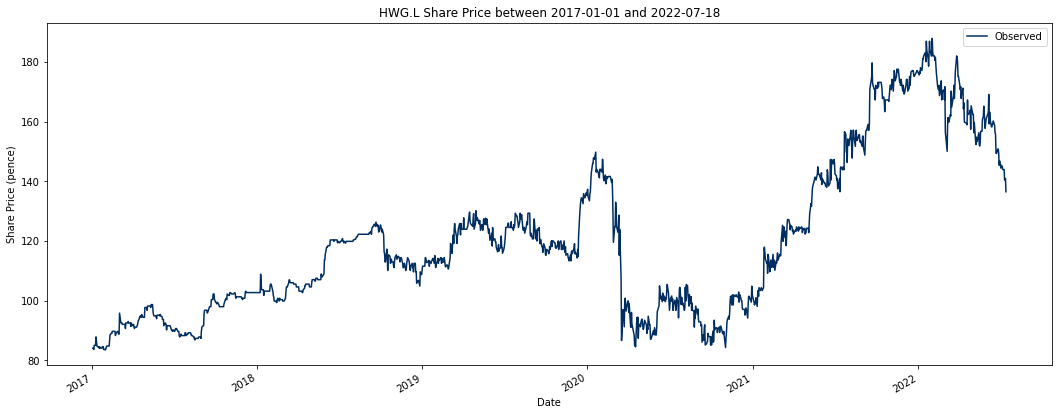

In [20]:
hwg_ticker = yf.Ticker('HWG.L')
harworth_df = hwg_ticker.history(start='2017-01-01', end='2022-07-18')
harworth_close = harworth_df['Close']
hwg_df = harworth_close.to_frame()
hwg_df = hwg_df.rename(columns={'Close': 'Observed'}) 

hwg_df.plot()
plt.title("HWG.L Share Price between 2017-01-01 and 2022-07-18")
plt.ylabel('Share Price (pence)')
plt.show()

We will be looking at their daily closing share price sourced from Yahoo finance from 2017-01-01 and 2022-07-18. In this time the stock has seen both steady and rapid growth as well as steep declines, most notabely when COVID-19 emerged in 2020 then a rapid recovery to all time records towards year end 2021.
***
## 1.2 USD of Ethereum
The USD closing price of Ethereum will be the focus in our next dataset. Ethereum is one of the worlds largest cryptocurrency and has seen rapid growth since its origin in 2008 and a lot of variations.

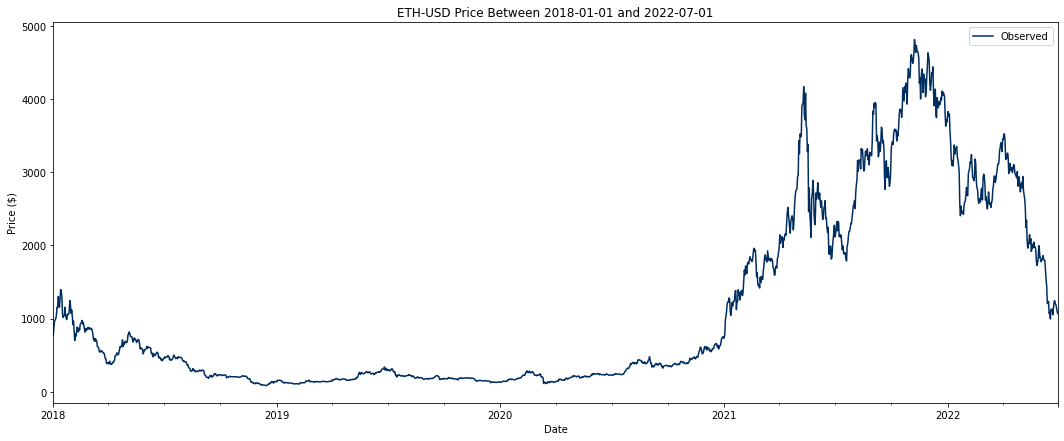

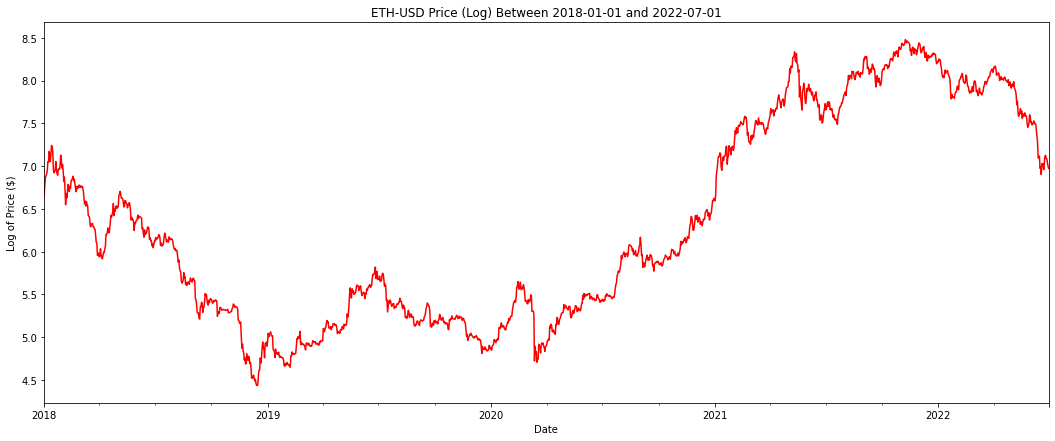

In [21]:
eth_ticker = yf.Ticker('ETH-USD')
eth_df = eth_ticker.history(start='2018-01-01', end='2022-07-01')
eth_df = eth_df['Close']
eth_df = eth_df.to_frame()
eth_df = eth_df.rename(columns={'Close': 'Observed'}) 
eth_df.plot()
plt.title("ETH-USD Price Between 2018-01-01 and 2022-07-01")
plt.ylabel('Price ($)')
plt.show()

eth_df['log'] = np.log(eth_df['Observed'])
eth_df['log'].plot(color='r')
plt.title("ETH-USD Price (Log) Between 2018-01-01 and 2022-07-01")
plt.ylabel('Log of Price ($)')
plt.show()

The data, shown in the graph above, captures the closing daily price of Ethereum between the start of 2018 to July 2022. The growth has been immense just like others in the cryptocurrency space. This growth can somewhat hide the volatility of the cryptocurrency - hence the graph with the log scale helps to show that Ethereum was still volatile before the price rose dramatically and seemingly continues to be just as volatile if not moreso.
***

## 1.3 S&P500
Another piece of financial data is the stock price of the S&P 500. The S&P 500 is an index fund of the top 500 performing companies in the US. It is regarded as one of the best investments in the modern era due to its good return rate and consistent growth over several decades. It has had many large dips due to macroeconomic conditions but growth after these periods has always exceeded past highs.

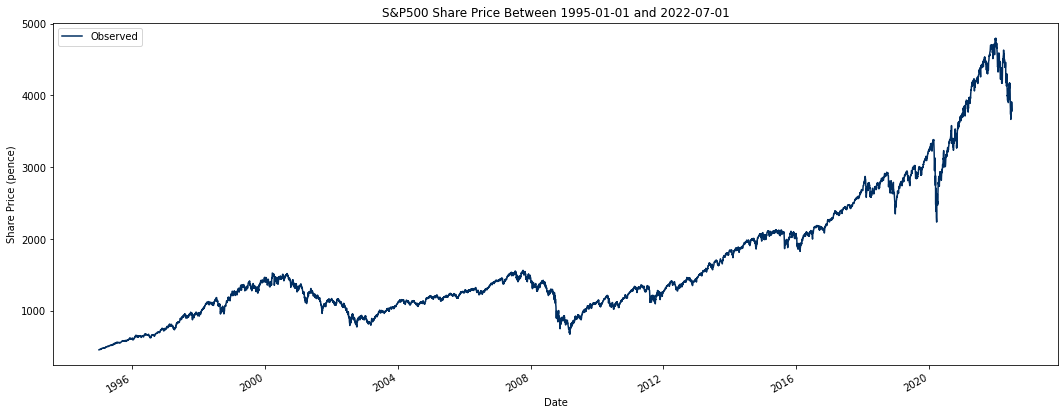

In [22]:
snp_ticker = yf.Ticker('^GSPC')
snp_df = snp_ticker.history(start='1995-01-01', end='2022-07-01')
snp_df = snp_df['Close']
snp_df = snp_df.to_frame()
snp_df = snp_df.rename(columns={'Close': 'Observed'}) 
snp_df.plot()
plt.title("S&P500 Share Price Between 1995-01-01 and 2022-07-01")
plt.ylabel('Share Price (pence)')
plt.show()

The S&P500 daily share price is shown in the above graph between 1995-01-01 to 2022-07-01. Several large dips can be seen, mostly in times of macroeconomic downturn such as during the 2008 financial crisis and COVID-19, but the overall trend is extremely positive with massive price increases in recent years, including post-Covid.

***
## 1.4 Daily Covid Deaths UK
The first piece of non-financial data we will explore is the daily covid deaths stats for the United Kingdom. This pandemic has caused waves of deaths across the globe which have had differing severity due to lockdowns and vaccine rollouts.

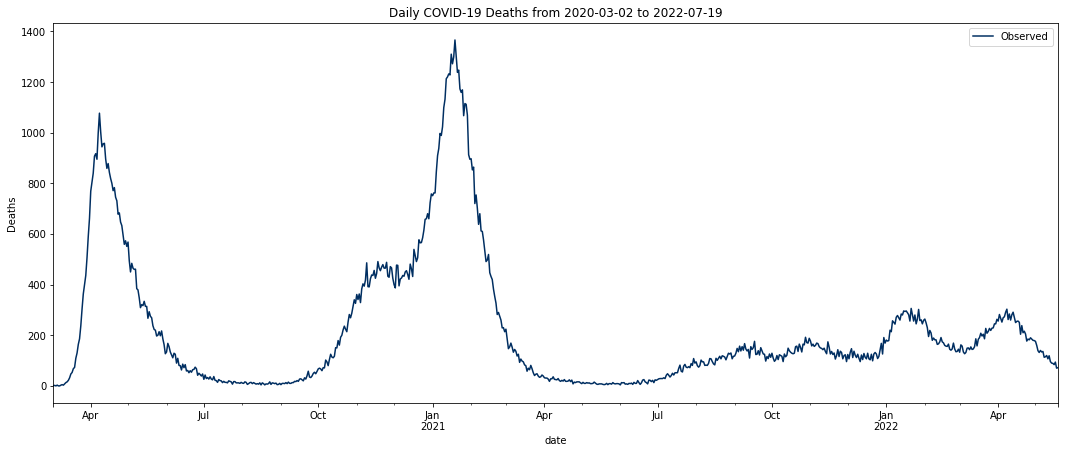

In [23]:
covid_df = pd.read_csv('daily_covid_deaths_uk.csv')
daily_deaths = covid_df[['date', 'newDeaths28DaysByDeathDate']]
daily_deaths = daily_deaths.rename(columns={'newDeaths28DaysByDeathDate':'Observed'})
daily_deaths['date'] = pd.to_datetime(daily_deaths['date'], dayfirst=True)
daily_deaths.index = daily_deaths['date']
del daily_deaths['date']
daily_deaths = daily_deaths.sort_index()

daily_deaths.plot()
plt.title("Daily COVID-19 Deaths from 2020-03-02 to 2022-07-19")
plt.ylabel('Deaths')
plt.show()

The graph above showns daily Covid-19 deaths in the UK from 2020-03-02 to 2022-07-19. The first and second peak can be seen and are extremely steep, showing where the country lost control of the amount of cases as the doubling time for the virus rose rapidly. The steep drop offs are also indicative of the subsequent lockdowns that were imposed. The lockdowns were imposed a few weeks before the deaths peaked and dropped off due to the lag time between contraction of the virus and death. After these inital couple of peaks, the population becam eiwdely vaccination, with several doses and boosters which has helped dull subsequent waves throughout the population as can be seen by the much shallower peaks throughout H2 2021 and 2022.

***
## 1.5 UK Ports Vehicle Flow
This dataset shows the total vehicle flow through all UK ports. Vehicle flow is likely to be impacted by macro-economic events, however it may be interesting to see how flow fluctuates in normal periods on average, to see whether it has any seasonality.

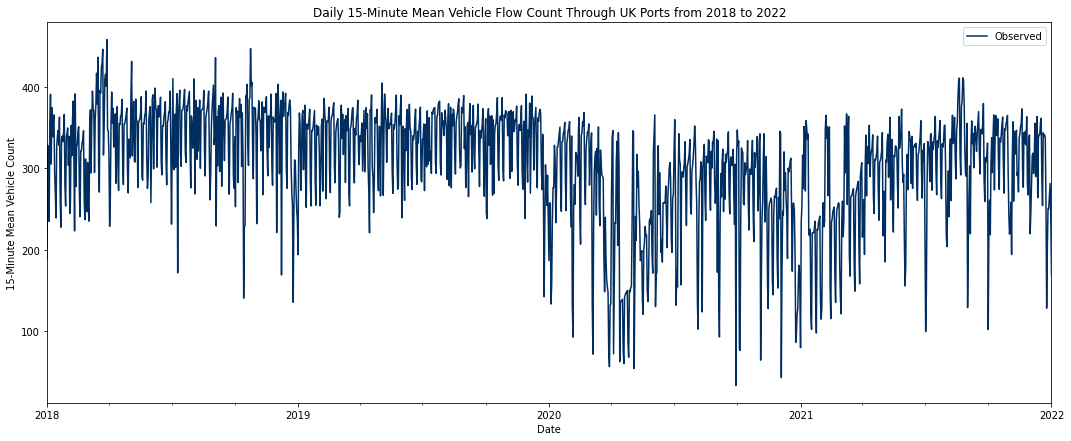

(-2.929861523972884,
 0.04198407829942322,
 23,
 1438,
 {'1%': -3.4349056408696814,
  '5%': -2.863552005375758,
  '10%': -2.5678411776130114},
 15353.570884866476)

In [24]:
UK_port_df = pd.read_csv("UK_port_activity.csv")
UK_port_df['Date'] = pd.to_datetime(UK_port_df['Date'])
UK_port_df.index = UK_port_df['Date']
del UK_port_df['Date']
UK_port_df = UK_port_df.sort_index()
UK_port_df = UK_port_df.rename(columns={'Total Vehicles':'Observed'})
UK_port_df = UK_port_df[UK_port_df.index<="2022-01-01"]
UK_port_df.plot()

plt.title("Daily 15-Minute Mean Vehicle Flow Count Through UK Ports from 2018 to 2022")
plt.ylabel('15-Minute Mean Vehicle Count')
plt.show()

adfuller(UK_port_df)

The above graph summarises our data and seems to indicate our data is quite stationary. The data shows the 15-minute mean vehicle flow on a daily basis through all UK ports throughout the years 2018-2021. We get a statistical confirmation that our data is stationary and we can reject the null hypothesis that the data is not stationary through use of the Dickey Fuller test (giving a P Value of 0.04198 which is less than the required 0.05).
***
## 1.6 US Retail Sales
The final piece of time series data we will analyse is the retail sales in the US. This comes from the FRED open source economic data and shows monthly variations in the monetary value of total retail sales across the US by month.

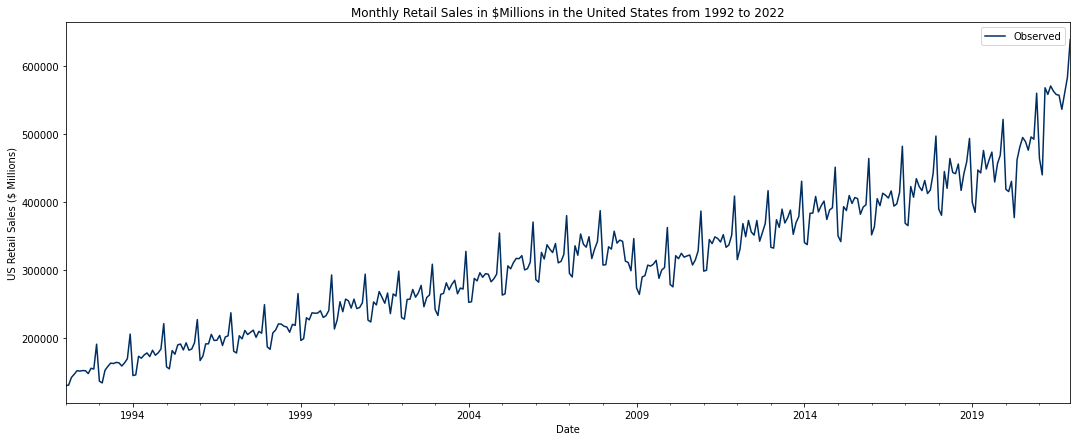

In [25]:
retail_df = pd.read_csv('FRED-RETAILSMNSA.csv')
retail_df = retail_df[['Date','Value']]
retail_df['Date'] = pd.to_datetime(retail_df['Date'])
retail_df.index = retail_df['Date']
del retail_df['Date']
retail_df = retail_df.rename(columns={'Value':'Observed'})
retail_df = retail_df.sort_index()

retail_df.plot()
plt.title("Monthly Retail Sales in $Millions in the United States from 1992 to 2022")
plt.ylabel('US Retail Sales ($ Millions)')
plt.show()

The graph above shows the monthly recorded total retail sales in the US from the start of 1992 to the end of 2021. It has clear seasonality throughout every year with an obvious peak at the end of every year, likely due to Christmas being celebrated by the majority of those living in the US. There seems to be a dip in the middle that coincides with the 2008 financial crash, potentially due to people having less disposable income. In addition, there seems to be a spike at the end of 2021, exceeding the previous trends steady growth, prehaps due to the easing of lockdowns as Covid restrictions lift heavily in this year.
***
# 2. Manipulating Time
***
***
At this stage, we are exploring how we can transform the time series data into easier formats and structures for analysis, which we can then transform back after analysis to its original form to see predictions etc. later on.

## 2.1 Trending Data Prep - Differences, Second Differences and Relative Differences
Firstly, a good idea in order to make predictions about data is to transform data as to increase its stationarity. This works well with trending data, and will help later when using predictive models on these data sets. To do this we will take different types of differences between the values in the datasets in order to flatten them into stationary datasets.

### 2.1.1 Calculate Differences Columns Function
This function takes a time series value column, and creates up to 3 differences columns, depending on which have been selected to be calculated. The difference types that can be calculated are the normal differences (current value - previous value), the second difference (same operation but carried out on the Difference column) and the relative difference (the calculated difference divided by the current value). These can be calculated by passing the 'd', 'sd' and 'rd' strings respectively into the diff_types list argument in the function.

This is useful as it will help us turn non-stationary data into stationary data, which aid in improving its use for forecast modelling use.

In [26]:
def calc_diff_columns(df, value_column, diff_types: list):
    
    fig, axes = plt.subplots(nrows=1, ncols=len(diff_types), figsize=(20, 4))
    
    differences = df[value_column] - df[value_column].shift()
    second_differences = differences - differences.shift()
    relative_differences = (df[value_column] - df[value_column].shift()) / df[value_column]
    
    Diff_name = '%s_Differences' % value_column
    sDiff_name = '%s_Second_Differences' % value_column
    rDiff_name = '%s_Relative_Differences' % value_column
    
    if 'd' in diff_types:
        df[Diff_name] = differences
    if 'sd' in diff_types:
        df[sDiff_name] = second_differences
    if 'rd' in diff_types:
        df[rDiff_name] = relative_differences
    
    n = 0
        
    for col in [Diff_name, sDiff_name, rDiff_name]:
        if col in df.columns:
            axes[n].plot(df[col])
            axes[n].set_title(col)
            axes[n].set_xlabel(df.index.name)
            axes[n].set_ylabel(col)

            n += 1
    plt.show()
    
    for pval in [df[value_column], df[Diff_name][1:], df[sDiff_name][2:], df[rDiff_name][1:]]:
        print("P-Value (%s) - " % pval.name, '{:.15f}'.format((adfuller(pval)[1])))

### 2.1.2 Harworth Group PLC

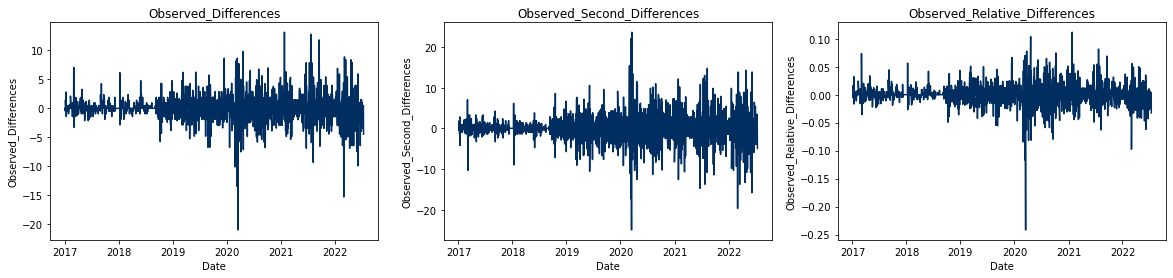

P-Value (Observed) -  0.349836228572134
P-Value (Observed_Differences) -  0.000000000000409
P-Value (Observed_Second_Differences) -  0.000000000000000
P-Value (Observed_Relative_Differences) -  0.000000000001215


In [27]:
calc_diff_columns(hwg_df, 'Observed', ['d', 'sd', 'rd'])

### 2.1.4 Ethereum

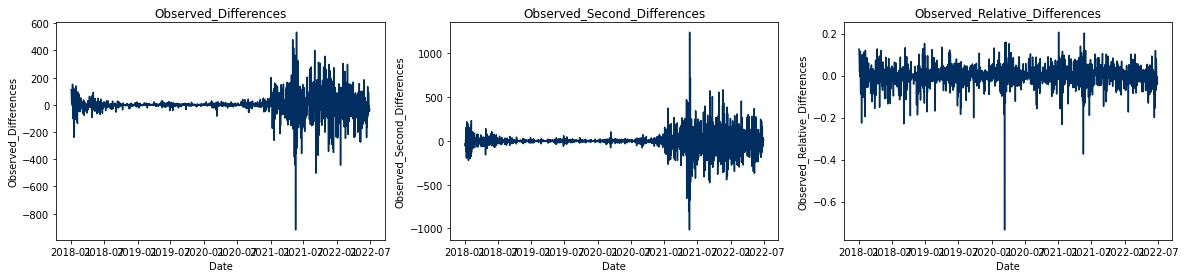

P-Value (Observed) -  0.656907968775169
P-Value (Observed_Differences) -  0.000000000000000
P-Value (Observed_Second_Differences) -  0.000000000000000
P-Value (Observed_Relative_Differences) -  0.000000000000000


In [28]:
calc_diff_columns(eth_df, 'Observed', ['d', 'sd', 'rd'])

### 2.1.3 S&P 500

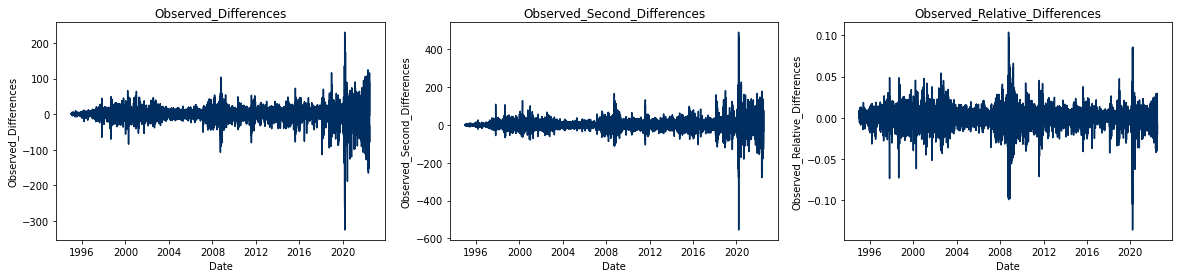

P-Value (Observed) -  0.980473332411334
P-Value (Observed_Differences) -  0.000000000000000
P-Value (Observed_Second_Differences) -  0.000000000000000
P-Value (Observed_Relative_Differences) -  0.000000000000000


In [29]:
calc_diff_columns(snp_df, 'Observed', ['d', 'sd', 'rd'])

As the graphs show for all three financial time series above, this has helped develop dataframes that now look to be stationary. This is confirmed as all 3 types of differences give P-Values for the ADF test significantly below 0.05 for each dataset. This allows us to reject the null hypothesis that they are non-stationary. As can be seen by the P-Values given for the original value columns for these datasets, none of them were stationary, with P-values narkedly larger than 0.05. These tranformations in the graphs above, besides making further analysis easier, show the variance of the dataset in a different way to the original values. For example in the Ethereum graphs, the first two differences show drastic increases in the differences. However, the realtive differences graph shows that Ethereum has had similiar volatility through the entire period. 

## 2.2 Seasonal Data Prep
Seasonal data can be prepared slightly differently. In order to do some initial preperations on the seasonal data, we will smooth out the seasonality of it a little bit, to leave us with more of a steady trend line. This will help us handle the data better in the analysis, where we can later add the seasonality back in, in order to give the most accurate predictions possible.

### 2.2.1 Smoothing Seasonality Function

In [30]:
def seasonality_smoothing(df, value_column, season_len):
    
    season_sum = [0] * season_len
    season_count = [0] * season_len

    for index, val in enumerate(df[value_column]):
        season_sum[index % season_len] += df[value_column][index]
        season_count[index % season_len] += 1

    season_mean = [0] * season_len
    for i in range(season_len):
        season_mean[i] = (season_sum[i] / season_count[i])

    mean = np.mean(df[value_column])


    season_offsets = [0] * season_len
    seasonally_adj = []

    for i in range(season_len):
        season_offsets[i] = season_mean[i] - mean
    
    for index, val in enumerate(df[value_column]):
        seasonally_adj.append(val - season_offsets[index % season_len])
    
    df['Seasonally_Adjusted'] = seasonally_adj

    df.plot()
    plt.show()

### 2.2.2 US Retail Sales

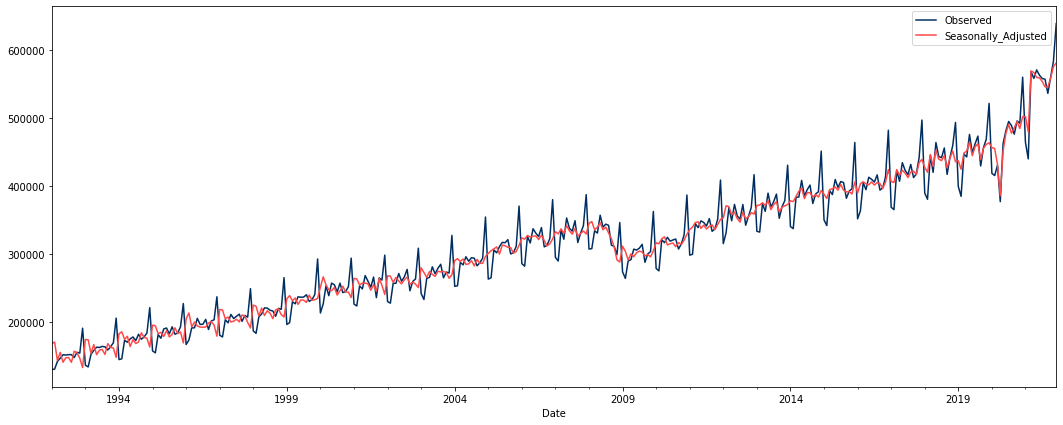

In [31]:
seasonality_smoothing(retail_df, 'Observed', 12)

As can be seen above, we have added a seasonaly adjusted column to the US retail dataframe. We used a seasonality increment of 12, as the data is given in months and the seasonality, as the graph shows, appears to alter over the course of every year, demonstrating the yearly seasonality from month to month. Hence, we used a period of 12 months to remove the seasonailty as much as possible. As can be seen, the seasonality is quite drastic with high variance from the normal trend towards the end of each year - likely due to Christmas having a large impact on sales. This therefore means that the seasonally adjusted line isn't completed smooth. However, it is successful in removing the large peaks, helping identify more uniform trends throughout the dataset, which will help in later analysis.

***
# 3. Basic Prediction Models
***
***
Now its time to start using some basic prediction techniques on our data and assess how well these perform. These basic techniques include naive and seasonal naive predictions as well as averages predictions. Naive predictions involve using the previous value as the next predicted value without changing or adjusting any factors, hence the name. Seasonal naive forecasting is very similar, although it just accounts for the seasonality of a dataset. Average forecasting is taking an average of the last (x) values to predict the next value in the dataset. The value for x can be optimised and will be different for each dataset dependant upon its characteristics.

Importantly, we will then assess and compare these methods by modelling the errors using maximum likelihood indictators, fomring our assessments into one table so we can compare these methods alongside other more sophisticated methods later on and determine how much value these more sophisticated models can add to our predictions.
## 3.1 Naive & Seasonal Naive Forecasting

### 3.1.1 (Seasonal) Naive Prediction Function
We will only need one function for both naive and seasonal naive predictions, as we can include the lag period in the arguments for the function, which is the only differentiator between the two methods.

In [32]:
def predict_lagged_naive(df, column, number):
    predicted = df[column].shift(number)
    df['Predicted_LN(%s)' % number] = predicted

### 3.1.2 Naive Prediction - UK Ports Vehicle Flow

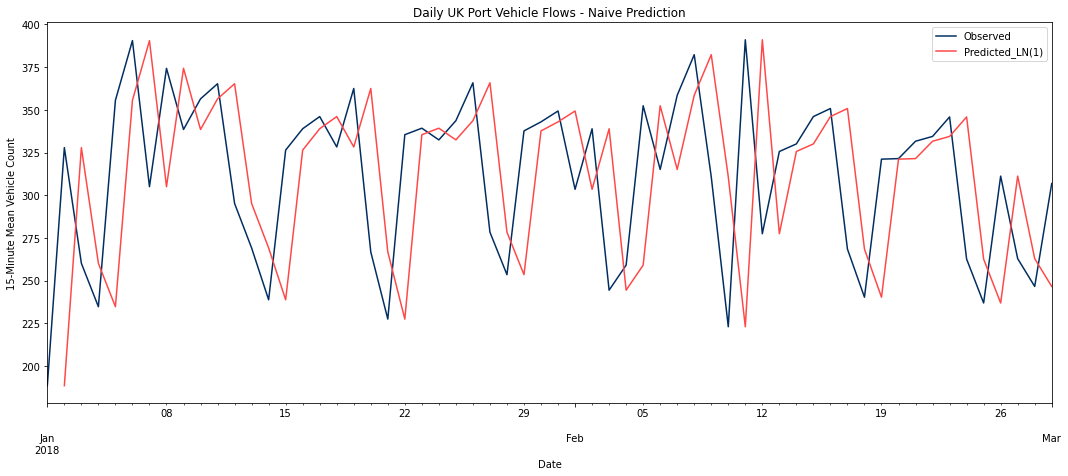

            Observed  Predicted_LN(1)
Date                                 
2018-01-01    188.54              NaN
2018-01-02    327.91           188.54
2018-01-03    260.18           327.91
2018-01-04    234.77           260.18
2018-01-05    355.60           234.77


In [33]:
predict_lagged_naive(UK_port_df, 'Observed', 1)

UK_port_df[['Observed', 'Predicted_LN(1)']]['2018-01-01':'2018-03-01'].plot()
plt.title("Daily UK Port Vehicle Flows - Naive Prediction")
plt.ylabel('15-Minute Mean Vehicle Count')

plt.show()

print(UK_port_df.head())

As the above table and graph shows, we have offset all the values by one place on the index. In this case it is daily, giving us our naive predictions. We have focused in on the first years quarter in the dataset to make the results more readable. For a simple technique, the graph seems to show reasonable results. However on closer inspection, due to the lag, it misses every peak and trough by one, which means it is actually significantly wrong on most points. This dataset helps show that as it has a high variance. This therefore, isn't an ideal way to give future predictions.

### 3.1.3 Seasonal Naive Prediction - US Retail Sales

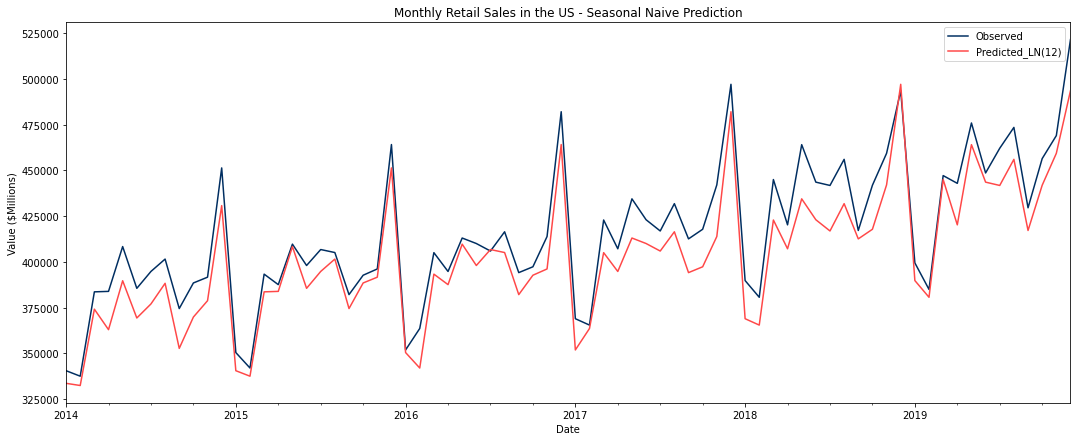

In [34]:
predict_lagged_naive(retail_df, 'Observed', 12)
retail_df[['Observed', 'Predicted_LN(12)']]['2014':'2019'].plot()
plt.title("Monthly Retail Sales in the US - Seasonal Naive Prediction")
plt.ylabel('Value ($Millions)')
plt.show()

As shown in ther results above, it is quite simple to adapt the naive prediction method into a seasonal prediction by adjusting the amount we shift the values. Again, it can be said that this is lacking sophistication and, although some predictions are close, others do have a substantial variance to the actual value. Hence, we move to a slightly more sophisticated technique using averages.

## 3.2 Averages Predictions

### 3.2.1 Average Predictions Functions
For this, we also have two methods. One is to simply take the average of the last (x) values to give the next prediction in the dataset, this takes a step up from the naive predictions but is still fairly simple. One slightly more sophisticated method is to take the average of the sum of the differences between the last (x) values. These functions are defined below.

In [35]:
def predict_avg(df, col_name, number):
    df['Predicted_Avg(%s)' % number] = (df[col_name].cumsum().shift(1) 
                       - df[col_name].cumsum().shift(number+1))/number
    
def predict_diff_avg(df, column, number):
    differences = df[column] - df[column].shift()
    pred_of_diff = (differences.cumsum().shift(1) - differences.cumsum().shift(number+1))/number
    df['Predicted_DiffAvg(%s)' % number] = pred_of_diff + df[column].shift()

### 3.2.2 Averages Predictons - Daily COVID-19 Deaths in UK

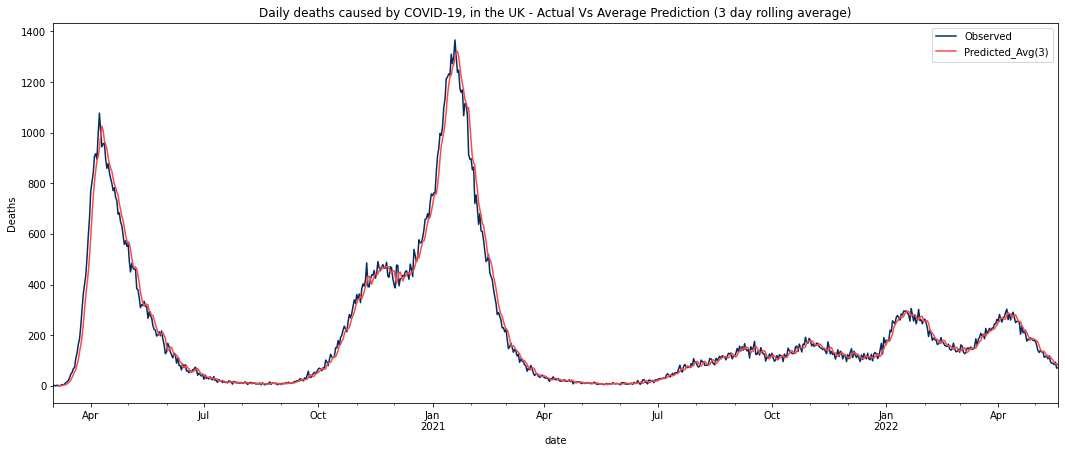

In [36]:
predict_avg(daily_deaths, 'Observed', 3)

daily_deaths.plot()
plt.title("Daily deaths caused by COVID-19, in the UK - Actual Vs Average Prediction (3 day rolling average)")
plt.ylabel('Deaths')
plt.show()

As the graph shows above, these predictions appear to be quite good, at least in a graphical representation. However, there still seems to be a noticable lag present when they are times of high fluctuation, which show this algorithm still has weaknesses. In order to make a slight improvement, we can use the next method which is to take the average of differences between an (x) amount of past values and then add this average difference on to the previous value to get our next value. This sounds slightly more sophisticated, lets compare this on the same dataset.

### 3.2.3 Difference Averages Predictions - Daily COVID-19 Deaths in UK
For this initial comaprision, we will use the same period of previosu records to take differences of as we did for the other averages method, where we used 3 days.

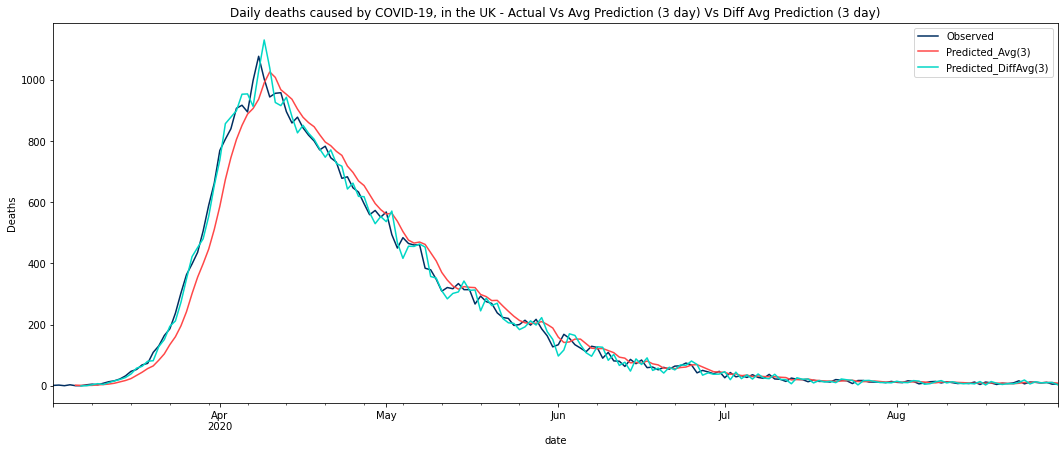

In [37]:
predict_diff_avg(daily_deaths, 'Observed', 3)

daily_deaths[0:182].plot()
plt.title("Daily deaths caused by COVID-19, in the UK - Actual Vs Avg Prediction (3 day) Vs Diff Avg Prediction (3 day)")
plt.ylabel('Deaths')
plt.show()

The graph above, showing the first 6 months of records we hold for the daily COVID-19 deaths data in UK, shows how the differences averages predictions seems to remove a lot of the lag that was still present in the standard averages predictions. In this snapshot of the first peak of deaths in the UK, it is clear that the differences averages, as well as removing a lot of the lag, also helps track the actual data more acurately as it doesn't remove as much opf the original variance as the standrad averages predictions did. The differences predicitions follow many short term peaks and troughs more closely.

## 3.3 Assessing our Predictions
Until now, we have relied heavily on graphical representations of our data, to demonstrate their utility. However, it is important we form some mathematical standard by which to judge these models.

### 3.3.1 Assess Predicitions Function
For this portfolio, we will use mean square error, which is the variance of the maximum likelihood estimator, and the root mean square error (RMSE) which is the standard deviation. The function for this calculation is below, which will give us these two values for each prediciton method we have used and pass to it. The lower the value the better, especially relative to the dataset it belongs to.

In [38]:
def assess_predictions(df, observed_col, predicted_col):
    total_err_sqr = 0
    total_predicted = 0
    predictions = df[predicted_col]
    values = df[observed_col]
    for value, prediction in zip(values, predictions):
        if prediction > 0 and value > 0:
            total_err_sqr += (prediction-value)**2
            total_predicted += 1
    variance = (total_err_sqr / total_predicted)
    
    return [variance, np.sqrt(variance)]

### 3.3.2 Optimising (x) in Average Predictions
Before comparing all of our models so far for each of the datasets I have selected, a good exercise is to optimise the period of time we use for the averaging predictions in order to fairly compare these to the other more simple prediction techniques, as well as further more complex techniques that will be carried out shortly.

#### Average Prediction Optimisation

In [39]:
avg_opt = {}
for df in [hwg_df, eth_df, snp_df, daily_deaths, UK_port_df, retail_df]:
    RMSEs = {}
    for i in range(2, 50):
        predict_avg(df, 'Observed', i)
        RMSEs['Predicted_Avg(%s)' % i] = assess_predictions(df, 'Observed', 'Predicted_Avg(%s)' % i)[1]
    best_x = min(RMSEs, key=RMSEs.get)
    print([x for x in globals() if globals()[x] is df][0] + ' - Best Avg Period: ' + best_x)
    avg_opt[[x for x in globals() if globals()[x] is df][0]] = int(best_x.split('(')[1][:-1])
    for col in df.columns:
        if col in RMSEs.keys() and col != best_x:
            df.drop(col, axis=1, inplace=True)

hwg_df - Best Avg Period: Predicted_Avg(2)
eth_df - Best Avg Period: Predicted_Avg(2)
snp_df - Best Avg Period: Predicted_Avg(2)
daily_deaths - Best Avg Period: Predicted_Avg(2)
UK_port_df - Best Avg Period: Predicted_Avg(31)
retail_df - Best Avg Period: Predicted_Avg(7)


#### Difference Average Prediction Optimisation

In [40]:
diff_avg_opt = {}
for df in [hwg_df, eth_df, snp_df, daily_deaths, UK_port_df, retail_df]:
    RMSEs = {}
    for i in range(1, 50):
        predict_diff_avg(df, 'Observed', i)
        RMSEs['Predicted_DiffAvg(%s)' % i] = assess_predictions(df, 'Observed', 'Predicted_DiffAvg(%s)' % i)[1]
    best_x = min(RMSEs, key=RMSEs.get)
    print([x for x in globals() if globals()[x] is df][0] + ' - Best DiffAvg Period: ' + best_x)
    diff_avg_opt[[x for x in globals() if globals()[x] is df][0]] = int(best_x.split('(')[1][:-1])
    for col in df.columns:
        if col in RMSEs.keys() and col != best_x:
            df.drop(col, axis=1, inplace=True)

hwg_df - Best DiffAvg Period: Predicted_DiffAvg(44)
eth_df - Best DiffAvg Period: Predicted_DiffAvg(36)
snp_df - Best DiffAvg Period: Predicted_DiffAvg(47)
daily_deaths - Best DiffAvg Period: Predicted_DiffAvg(9)
UK_port_df - Best DiffAvg Period: Predicted_DiffAvg(49)
retail_df - Best DiffAvg Period: Predicted_DiffAvg(12)


This exercise has helped us optimise, to a certain extent, the period which we use for our averages predictions. For the first averages algorithm, you can see it highlights the nature of the datasets as it highlights the seasonality present in some datasets (UK ports data and retail data). However, it also shows that for data without a predictable pattern such as the ones with stationarity or seasonality, the average period is optimised at one.

This contrasts with the differences algorthm which appears to optimise close to the 50 iterations we gave it for most datasets. Hence, we could possible further optimise it if we give it a larger limit, but for the scope of this portfolio, we will take them as sufficiently optimised.

### 3.3.3 Completing techniques on all datasets & Computing RMSE

In [41]:
data = {
    "Naive": [np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],
    "S_Naive": [np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],
    "Avg": [np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],
    "Diff_Avg": [np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]
}
 
errors_df = pd.DataFrame(data, index = ['hwg_df', 'eth_df', 'snp_df', 'daily_deaths', 'UK_port_df', 'retail_df'])

for df in [hwg_df, eth_df, snp_df, daily_deaths, UK_port_df, retail_df]:
    
    df_name = [x for x in globals() if globals()[x] is df][0]
    
    predict_lagged_naive(df, 'Observed', 1)
    predict_avg(df, 'Observed', avg_opt[df_name])
    predict_diff_avg(df, 'Observed', diff_avg_opt[df_name])
        
    if df_name =='UK_port_df':
        predict_lagged_naive(df, 'Observed', 31)
        errors_df['S_Naive'][df_name] = assess_predictions(df, 'Observed', 'Predicted_LN(31)')[1] 
        
    if df_name == 'retail_df':
        predict_lagged_naive(df, 'Observed', 12)
        errors_df['S_Naive'][df_name] = assess_predictions(df, 'Observed', 'Predicted_LN(12)')[1] 
        
    
    errors_df['Naive'][df_name] = assess_predictions(df, 'Observed', 'Predicted_LN(1)')[1]
    errors_df['Avg'][df_name] = assess_predictions(df, 'Observed', 'Predicted_Avg(%s)' % avg_opt[df_name])[1] 
    errors_df['Diff_Avg'][df_name] = assess_predictions(df, 'Observed', 'Predicted_DiffAvg(%s)' % diff_avg_opt[df_name])[1] 

        
errors_df['Best Alg'] = errors_df.idxmin(axis=1)
errors_df = round(errors_df, 3)
errors_df

Naive    S_Naive        Avg   Diff_Avg  Best Alg
hwg_df            2.506        NaN      2.580      2.557     Naive
eth_df           81.470        NaN     88.563     81.888     Naive
snp_df           21.775        NaN     23.260     22.072     Naive
daily_deaths     24.850        NaN     27.784     23.603  Diff_Avg
UK_port_df       61.638     74.931     56.702     62.113       Avg
retail_df     33150.678  24153.515  26096.751  33637.869   S_Naive

As the above table shows, we have differing optimum algorithms for datasets with different properties. Note that Seasonal Naive hasn't been computed for non-seasonal datasets, but we have attempted computations of all other algorithms for all other datasets and the associated RMSE for each. This demostrates how financial datasets work slightly better with naive than the Average method, due to the random walk nature that financial datasets can take. However, the difference average algorithm is a close second on most records, but is only the optimum for one dataset. This may be due to our limiation in optimisation with only giving it 50 iterations. The results also indicate that naive, despite its lack of sophistication, does harbour good results compared to the other simple methods we have tried for data with some trending but no other obvious predictable features. Seasonal Naive worked well on the extremely seasonal dataset of US retail sales.

We will continue to fill this out as we try more sophisticated algorithms going forward.

***
# 4. Regression
***
***
Importantly, we have discovered how different algorithms can give better predictions than others. We will now look for algorithms to further improve our RMSE results. Now we turn to regression techniques. First we must find good candidates for this type of analysis as well as fine tune the parameters of such regression equations in order to improve our predictions and further reduce the RMSE figures. 

## 4.1  PACF analyses

### 4.1.1 Plots Comparison
The UK port activity data seems to have the most stationarity out of all our datasets - hence this should make it a relatively good candidate for AR. Lets carry out a PACF analysis on the Observed column for all our datasets to see if any other datasets will be.

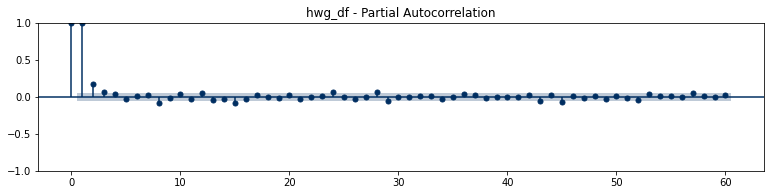

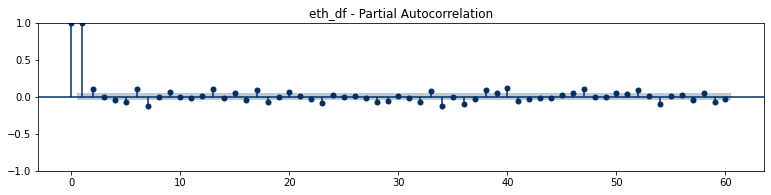

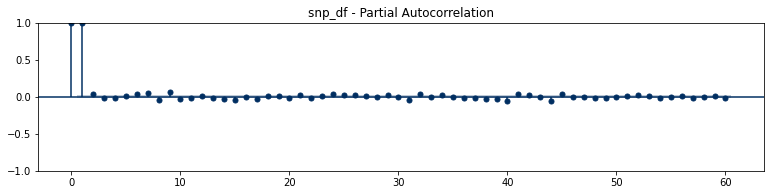

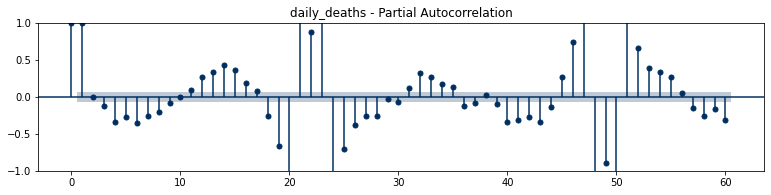

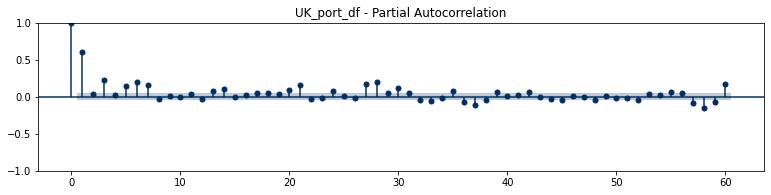

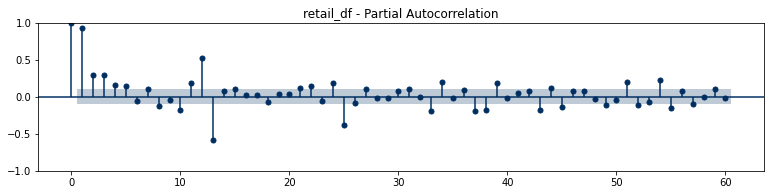

In [42]:
for df in [hwg_df, eth_df, snp_df, daily_deaths, UK_port_df, retail_df]:
    fig = plt.figure(figsize=(13,6))
    ax1 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(df['Observed'], lags=60, ax=ax1,
                                    title=[x for x in globals() if globals()[x] is df][0] + " - Partial Autocorrelation")

As the PACF graphs above show, some of our datasets are more suited to AR than others. It seems that our bottom 3 datatsets look to be the most suitable and hence we will use these initally. Later methods will include using the differences columns we made earlier on the stock data that made the data stationary, in order to make them suitable for regression models. In their raw form, as the first 3 graphs show, no correlation can be found. 

For our 3 selected datasets (daily_deaths, UK_port_df, and retail_df) we will use **6, 28** and **12** respectively as our p values for our AR(p) calculations.

## 4.2 AR Models

### 4.2.1 AR(p) Functions *(and add records to errors_df Function)*
Below we have defined our functions for doing some simple AR(p) analysis. In future, more complex uses of regressions we will likely use the statsmodels package, but to demonstrate the mathematical techniques we have formed the below. In addition, we have defined a function that helps us add RMSE values to our errors_df table, so that we can compare new techniques against our existing ones.

In [43]:
def train_ar(df, value_col, order):
    
    if (isinstance(df, pd.Series)):
        values = df
    else:
        values = df[value_col]
        
    target_vector = np.array(values[order:])
    lagged_values = []
    for i in range(len(values) - order):
        lagged_values.append(values[i:i+order])
    design_matrix = np.array(lagged_values)
    return linear_regression(design_matrix, target_vector)

def linear_regression(design_matrix, target_vector):
    return np.linalg.inv(design_matrix.transpose() @ design_matrix) @ design_matrix.transpose() @ target_vector

def predict(df, value_col, coeffs):
    
    if (isinstance(df, pd.Series)):
        data = df
    else:
        data = df[value_col]

    predicted_values = [np.nan] * len(coeffs)
    for i in range(len(coeffs), len(data)):
        predicted_values.append(np.dot(coeffs, data[i-len(coeffs):i]))
    return np.array(predicted_values)

def add_error_col(errors_df, col_name, df_name, value):
    
    if col_name in errors_df.columns:
        errors_df[col_name][df_name] = value
    else:
        errors_df[col_name] = np.NaN
        errors_df[col_name][df_name] = value
    
    cols_at_end = ['Best Alg']
    errors_df = errors_df[[c for c in errors_df if c not in cols_at_end] 
            + [c for c in cols_at_end if c in errors_df]]
    errors_df[errors_df.columns[:-1]] = errors_df[errors_df.columns[:-1]].apply(pd.to_numeric)
    errors_df['Best Alg'] = errors_df[errors_df.columns[:-1]].idxmin(axis='columns')
    errors_df = round(errors_df, 3)
    return errors_df

### 4.2.1 Daily COVID-19 Deaths

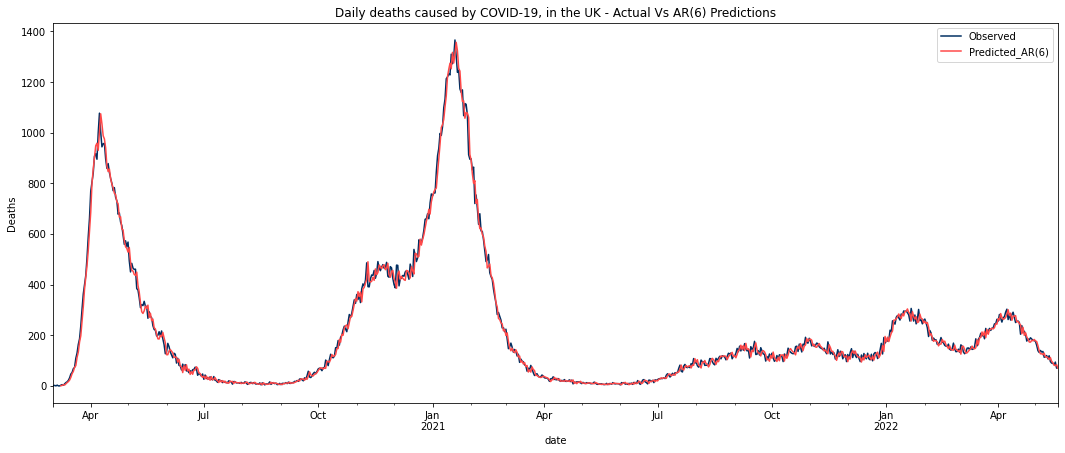

Naive    S_Naive        Avg   Diff_Avg   AR(p) Best Alg
hwg_df            2.506        NaN      2.580      2.557     NaN    Naive
eth_df           81.470        NaN     88.563     81.888     NaN    Naive
snp_df           21.775        NaN     23.260     22.072     NaN    Naive
daily_deaths     24.850        NaN     27.784     23.603  22.165    AR(p)
UK_port_df       61.638     74.931     56.702     62.113     NaN      Avg
retail_df     33150.678  24153.515  26096.751  33637.869     NaN  S_Naive

In [44]:
coeffs = train_ar(daily_deaths, 'Observed', 6)
daily_deaths['Predicted_AR(6)'] = predict(daily_deaths, 'Observed', coeffs)
daily_deaths[['Observed', 'Predicted_AR(6)']].plot()
plt.title("Daily deaths caused by COVID-19, in the UK - Actual Vs AR(6) Predictions")
plt.ylabel('Deaths')
plt.show()

RMSE = assess_predictions(daily_deaths, 'Observed', 'Predicted_AR(6)')[1]
add_error_col(errors_df, 'AR(p)', 'daily_deaths', RMSE)

As the above graph and RMSE demonstrates, our AR(p) model has given us a better prediction that our other models for the daily_deaths data, despite this data being non-stationary. The issue with this simple AR(p) method however, is it cannot help predict long periods into the future, it can only be one or a few periods at a time to give satisfactory results. This is the same for most of our algorithms. We will demonstrate this below with stats models AutoReg function. In this case we pass it training data and test data, and it can predict further in our dataset - however we will see the limitations of this model, as it converges to a single value the further out it tries to predict based on its own previous predictions.

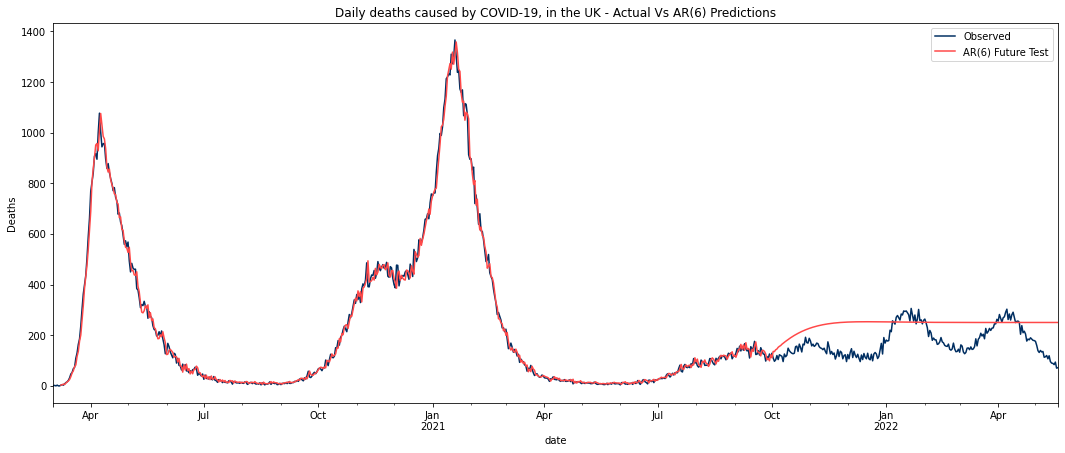

RMSE - 51.027


In [45]:
results = sm.tsa.AutoReg(daily_deaths['Observed'][:'2021-10-01'], 6).fit()
predicted = results.predict(end='2022-07-19')
daily_deaths['AR(6) Future Test'] = predicted
daily_deaths[['Observed', 'AR(6) Future Test']].plot()
plt.title("Daily deaths caused by COVID-19, in the UK - Actual Vs AR(6) Predictions")
plt.ylabel('Deaths')
plt.show()

print('RMSE - ' + str(round(assess_predictions(daily_deaths, 'Observed', 'AR(6) Future Test')[1], 3)))

As you can see, the predictions for beyond the training data are not accurate at all and have a massive negative impact on our RMSE which is now at 51.027 with these innacurate predictions of the test data, compared to 22.165 RMSE when predicted one value at a time, with real values replacing our predictions as we move through the dataset.

### 4.2.2 UK Port Vehicle Flow

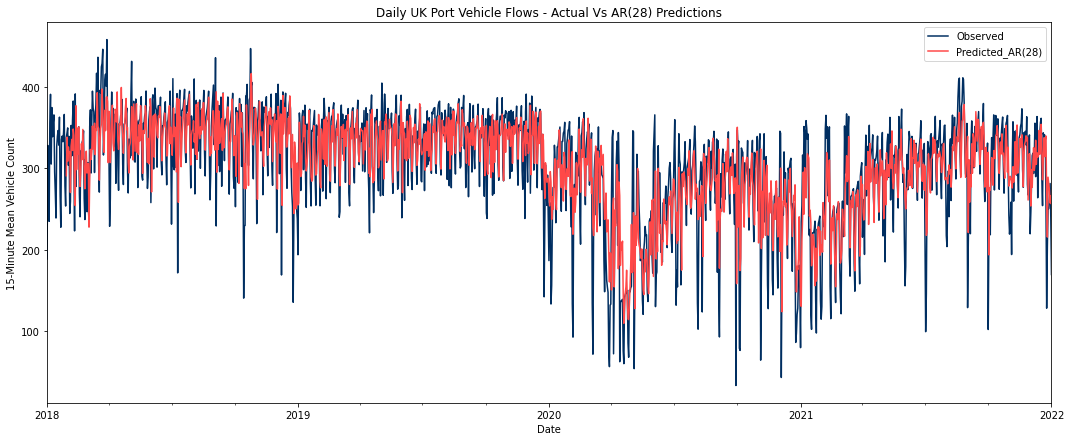

Naive    S_Naive        Avg   Diff_Avg   AR(p) Best Alg
hwg_df            2.506        NaN      2.580      2.557     NaN    Naive
eth_df           81.470        NaN     88.563     81.888     NaN    Naive
snp_df           21.775        NaN     23.260     22.072     NaN    Naive
daily_deaths     24.850        NaN     27.784     23.603  22.165    AR(p)
UK_port_df       61.638     74.931     56.702     62.113  48.224    AR(p)
retail_df     33150.678  24153.515  26096.751  33637.869     NaN  S_Naive

In [46]:
coeffs = train_ar(UK_port_df, 'Observed', 28)
UK_port_df['Predicted_AR(28)'] = predict(UK_port_df, 'Observed', coeffs)
UK_port_df[['Observed', 'Predicted_AR(28)']].plot()
plt.title("Daily UK Port Vehicle Flows - Actual Vs AR(28) Predictions")
plt.ylabel('15-Minute Mean Vehicle Count')
plt.show()

RMSE = assess_predictions(UK_port_df, 'Observed', 'Predicted_AR(28)')[1]
add_error_col(errors_df, 'AR(p)', 'UK_port_df', RMSE)

### 4.2.2 US Retail Sales

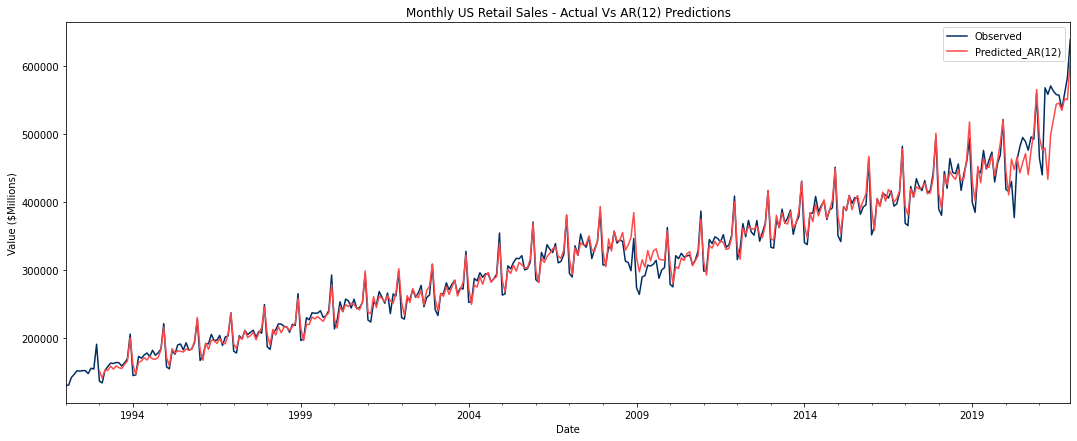

Naive    S_Naive        Avg   Diff_Avg      AR(p) Best Alg
hwg_df            2.506        NaN      2.580      2.557        NaN    Naive
eth_df           81.470        NaN     88.563     81.888        NaN    Naive
snp_df           21.775        NaN     23.260     22.072        NaN    Naive
daily_deaths     24.850        NaN     27.784     23.603     22.165    AR(p)
UK_port_df       61.638     74.931     56.702     62.113     48.224    AR(p)
retail_df     33150.678  24153.515  26096.751  33637.869  15517.411    AR(p)

In [47]:
coeffs = train_ar(retail_df, 'Observed', 12)
retail_df['Predicted_AR(12)'] = predict(retail_df, 'Observed', coeffs)
retail_df[['Observed', 'Predicted_AR(12)']].plot()
plt.title("Monthly US Retail Sales - Actual Vs AR(12) Predictions")
plt.ylabel('Value ($Millions)')
plt.show()

RMSE = assess_predictions(retail_df, 'Observed', 'Predicted_AR(12)')[1]
add_error_col(errors_df, 'AR(p)', 'retail_df', RMSE)

As you can see, this method, despite not having much stationary data to play with, still makes an improvement upon the short-term predictions for the datasets we have tested it on. All 3 now have an improved RMSE thanks to the AR(p) algorithm. Its likely the case we could improve upon our first 3 datasets also, so we shall test one below in a simulated training analysis. I don't expect this to work perfectly but hopefully it can show somewhat the power of even simple forecasting. The other datasets will come in to play when we use even more sophisticated techniques later to try and account for the weaknesses this algorithm has, especially in terms of longer-term forecasting.

## 4.3 AR(p) & Simulated Trading

### 4.3.1 Harworth Group PLC (HWG.L)
First, lets carry out our AutoRegression for Harworth Group PLC daily share price. Then, we will define a function to carry out a simple simulated trading program. This will simply involve holding shares on all days where our prediction is (x)% higher than the previous days close, and selling those shares when this is not the case.

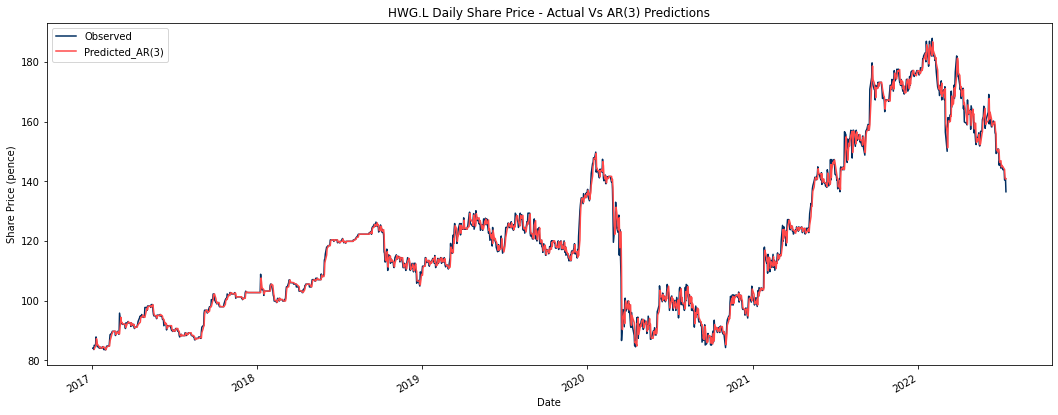

Naive    S_Naive        Avg   Diff_Avg      AR(p) Best Alg
hwg_df            2.506        NaN      2.580      2.557      2.455    AR(p)
eth_df           81.470        NaN     88.563     81.888        NaN    Naive
snp_df           21.775        NaN     23.260     22.072        NaN    Naive
daily_deaths     24.850        NaN     27.784     23.603     22.165    AR(p)
UK_port_df       61.638     74.931     56.702     62.113     48.224    AR(p)
retail_df     33150.678  24153.515  26096.751  33637.869  15517.411    AR(p)

In [48]:
coeffs = train_ar(hwg_df, 'Observed', 3)
hwg_df['Predicted_AR(3)'] = predict(hwg_df, 'Observed', coeffs)
hwg_df[['Observed', 'Predicted_AR(3)']].plot()
plt.title("HWG.L Daily Share Price - Actual Vs AR(3) Predictions")
plt.ylabel('Share Price (pence)')
plt.show()

RMSE = assess_predictions(hwg_df, 'Observed', 'Predicted_AR(3)')[1]
add_error_col(errors_df, 'AR(p)', 'hwg_df', RMSE)

In [102]:
def trading_simulation(df, value_col, predict_col, portfolio_val, ticker, percent_required, save_name):
    
    df['isHolding'] = df[predict_col] > (df[value_col].shift() * (1+(percent_required/100)))
    
    last_price = None
    portfolio_value = portfolio_val
    values = []
    for ts, (close, _, is_holding) in df[[value_col, predict_col, 'isHolding']].iterrows():
        if is_holding:
            portfolio_value *= close / last_price
        last_price = close
        values.append(portfolio_value)
        
    P_L = 'profit' if portfolio_value >= portfolio_val else 'loss'
    
    print('Your portfolio value is ' + str("£{:,.2f}".format(round(portfolio_value, 2))) 
          + ' (a %s of %s)' % (P_L, str("£{:,.2f}".format(round(portfolio_value -  portfolio_val, 2)))))
    df['EquityVal'] = values
    df['EquityVal'].plot()
    plt.title("Portfolio Value Over Time with %s Investments" % ticker)
    plt.ylabel('Portfolio Value (£)')
    if save_name != None:
        plt.savefig('%s.png' % save_name)
    plt.show()

Your portfolio value is £42,836.22 (a profit of £32,836.22)


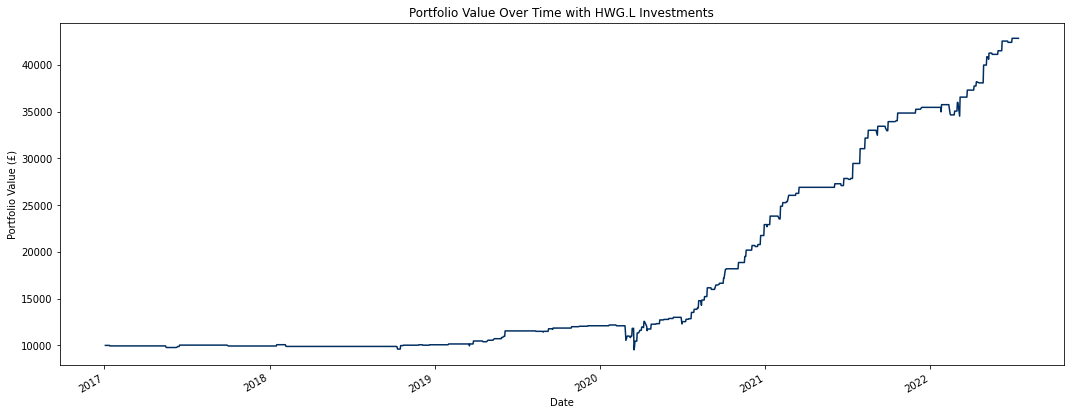

In [50]:
trading_simulation(hwg_df, 'Observed', 'Predicted_AR(3)', 10_000, 'HWG.L', 0.4)

The above demonstrates, that although it may only be able to accurately predict one share price at a time with this AR(p) method, it can still be powerful. However, it is wise to know it could easily be loss making if we fine tune parameters such as how much higher the prediction needs to be compared to the previous value (at 0.4% in the simulation above).

***
# 5. Dicing with the Future
***
***
Here we will introduce Monte Carlo methods in order to help predict further into the future using random walk methods combined with AR models we have used previously. This will help us find potential futures for our datasets. In addition, this will then allow us to ask questions about our data, using the Kernel density estimation. This distribution will help us ask questions about the future of our data, such as the percentage of futures in which the share price wil drop below a certain price.

## 5.1 Monte Carlo Methods

### 5.1.1 AR & Monte Carlo Function
This function will allow us to use inputs from our AR functions such as the coeffs and the RMSE of the algorithm, as well as a few other parameters to give us a (x) amount of trajectories of a specified length into the future.

In [59]:
def AR_monte_carlo(df, value_col, coeffs, num_samples, trajectory_length, std_dev, save_name):

    coeffs = np.array(coeffs)
    num_coeffs = coeffs.shape[0]
    length = len(df[value_col])

    initial_values = np.array(df[value_col]).reshape(1,-1)
    values = np.broadcast_to(initial_values, (num_samples, length))

    for i in range(trajectory_length):
        next_prediction = values[:,-num_coeffs:] @ coeffs 
        next_column = next_prediction + std_dev * np.random.randn(num_samples)
        values = np.append(values, next_column.reshape(num_samples, 1), axis=1)
    
    pred_vals_only = []
    for val in values:
        pred_vals_only.append(val[length+1:])
    pred_vals_only = np.vstack(pred_vals_only)
    
    plt.plot(values.transpose())
    plt.title("%s - Monte Carlo Predictions (%s trajectories)" % ([x for x in globals() if globals()[x] is df][0], num_samples))
    plt.ylabel('Value')
    if save_name != None:
        plt.savefig('%s.png' % save_name)
    plt.show()
    
    return next_column, pred_vals_only, num_samples

### 5.1.2 Daily COVID-19 Deaths & HWG.L Share Price
Here we can see how the monte carlo method is producing random futures based on the data it has been passed. For the Covid-19 deaths, I limited the algorithm to 10 trajectories so it is more visible to see in the dataset, but this can be done with countless samples. Take for example, the HWG.L plot below it, where I have plotted 1000 possibilities. This therefore covers a wider range of possibilites for the share price as more random futures have been produced.

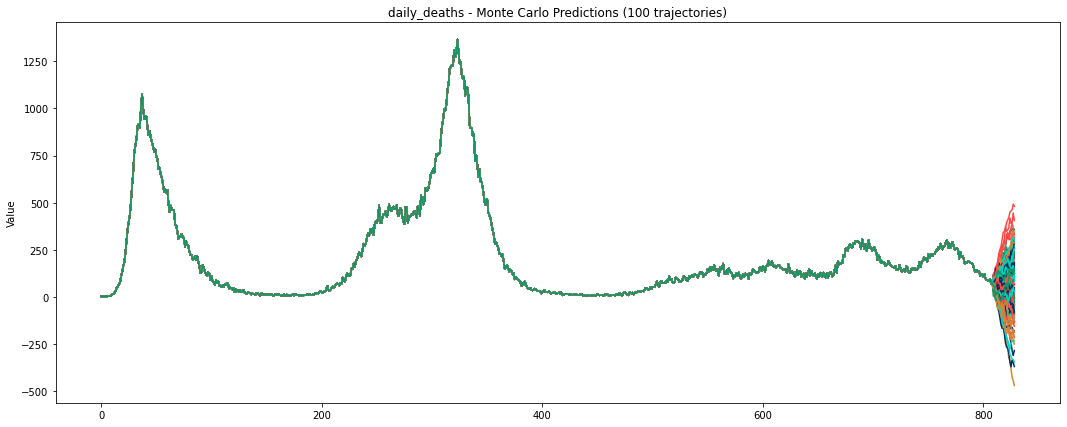

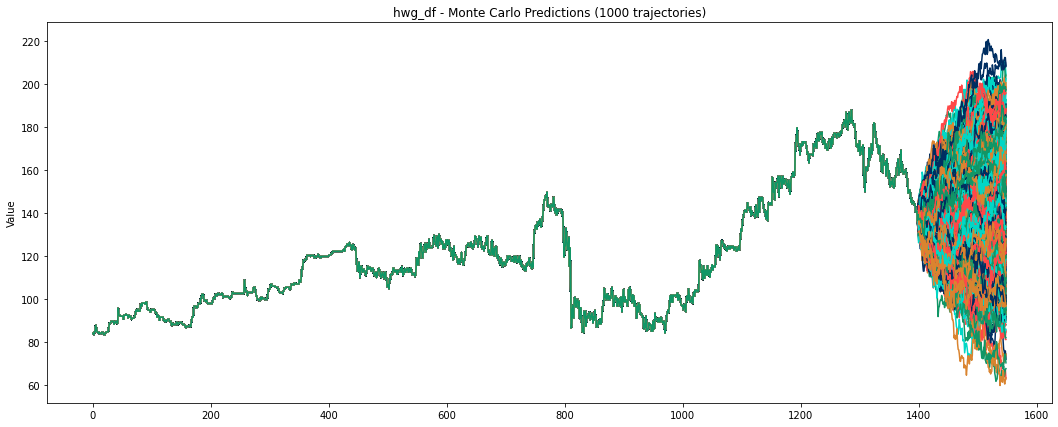

In [60]:
daily_deaths_MC = AR_monte_carlo(daily_deaths, 'Observed', train_ar(daily_deaths, 'Observed', 6), 100, 20, 21.321, None)
hwg_df_MC = AR_monte_carlo(hwg_df, 'Observed', train_ar(hwg_df, 'Observed', 3), 1000, 150, 2.512, 'HWG.L AutoRegression(3) Monte Carlo Simulation')

## 5.2 MC Analysis
Now we have carried out Monte Carlo methods with our AR predictions to create a host of potential futures for our datasets, we can analyse these results and ask some questions about our datas future. First we need to define some functions to help with this.

### 5.2.1 Kernel Density & MC Probability Function
The KDE function will allow us to plot the kernel density graph of our future predictions. This will show us the properties of our futures distribution in a graphical way and help us to estimate certain liklihoods. In addition, the probability function will enable us to determine the percentage chance of having a future that lies between two limits that we pass it, based upon the futures that we have predicted. Finally we will also define a function that tells us the liklihood that a future outcome will fall above or below a threshold. 

In [61]:
def graph_KDE(data, xlabel):
    dens = sm.nonparametric.KDEUnivariate(data)
    dens.fit()
    plt.plot(dens.support, dens.density)
    plt.title('Kernel Density Estimation')
    plt.ylabel('Density of Probability')
    plt.xlabel(xlabel)
    plt.show()
    
def prob_between(arr, lower, higher):
    count = np.count_nonzero((arr > lower) & (arr < higher))
    return round(count/arr.size,4)

def threshold(threshold, values, num_samples, direction):
    if direction == 'above':
        bools = values > threshold
    elif direction == 'below':
        bools = values < threshold 
    bad_rows= np.any(bools,axis=1)
    probability = bad_rows.sum()/num_samples
    return probability

### 5.2.2 Daily COVID-19 Deaths

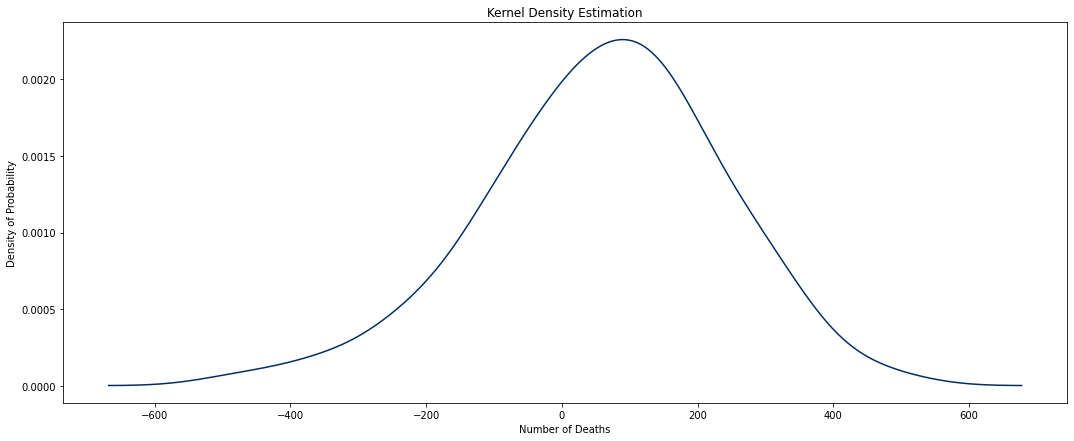

Probability of having a future value lying between 100 and 200- 0.21
Probability of having a future value above threshold of 400 - 0.02


In [62]:
graph_KDE(daily_deaths_MC[0], 'Number of Deaths')
print('Probability of having a future value lying between 100 and 200- ' + 
      str(prob_between(daily_deaths_MC[0], 100, 200)))
print('Probability of having a future value above threshold of 400 - ' + 
      str(threshold(400, daily_deaths_MC[1], daily_deaths_MC[2], 'above')))

As the above KDE graph shows, a relatively normal distribution is present in our data. One alteration we may wish to make in the future is to account for the MC simulations giving values below 0 for time series data where it would not make sense, as is the case here with Covid-19 deaths. However, we can still start to ask interesting questions about oru data as shown above. The examples shown demonstrate that the MC future predictions have a 14% chance of having a value between 100 and 200, and a 3% chance of breaking a 400 deaths threshold.

### 5.2.3 HWG.L Share Price

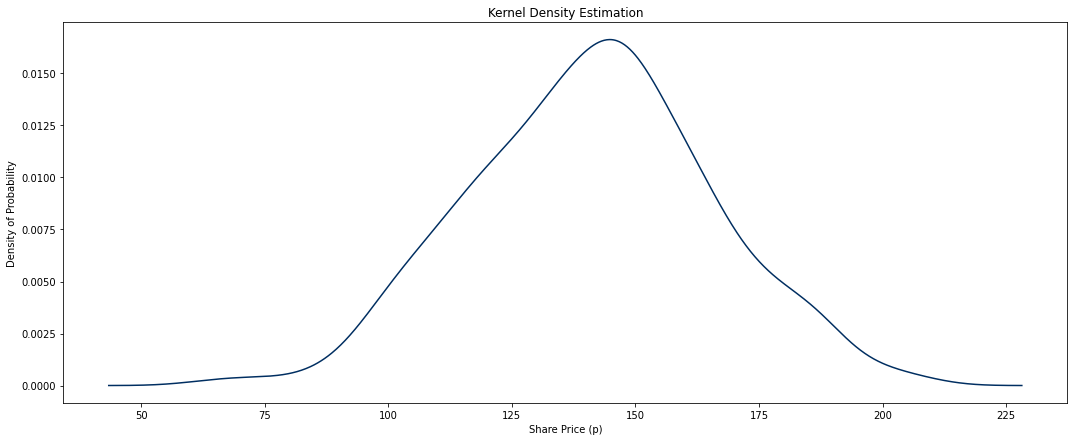

Probability of having a future value lying between 150p and 200p- 0.347
Probability of having a future value below threshold of 100p - 0.095


In [63]:
graph_KDE(hwg_df_MC[0], 'Share Price (p)')
print('Probability of having a future value lying between 150p and 200p- ' + 
      str(prob_between(hwg_df_MC[0], 150, 200)))
print('Probability of having a future value below threshold of 100p - ' + 
      str(threshold(100, hwg_df_MC[1], hwg_df_MC[2], 'below')))

This KDE graph has a similar distribution to that of the COVID-19 deaths one, as they appear similar in shape. This one however, is leaning slightly right-skewed compared to the other deaths related ones. This HWG.L share price one also tapers off a little more hence having a skinner distribution and likely a smaller standrad deivation within its own context. We are hence able to determine that there is approximately a 33% chance that a future value will reside between 150-200p, and just under a 10% chance that the share price will drop below the £1 mark.

It is clear this technique allows us to ask more sophisticated questions about our data than previous techniques.

***
# 6. Decomposition
***
***
We now turn to look at methods where we decompose data into its seperate parts, do analysis on them suitable for the decomposed types and then put them back together afterwards to get our final results. This aims to tackle each element of the data more accurately, to give us more accurate predictions.

## 6.1 Smoothing
There are several splitting tasks we need to do, the first of which is to take the trend of the dataset. We do this by smoothing the dataset to see the overall trend. There are several ways to do this, one of which is to take a moving average of the data.

### 6.1.1 Moving Average
Here we use our previously created **predict_avg** function to create the moving average of our data of an (x) amount of time intervals. This moving average is what will smooth our data out into its trend for us.

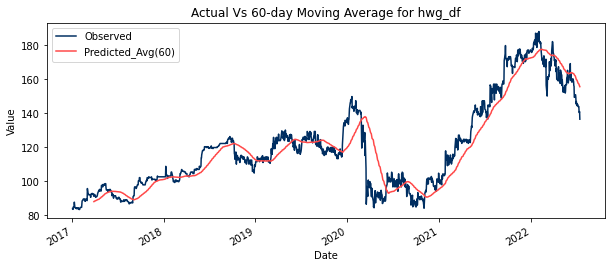

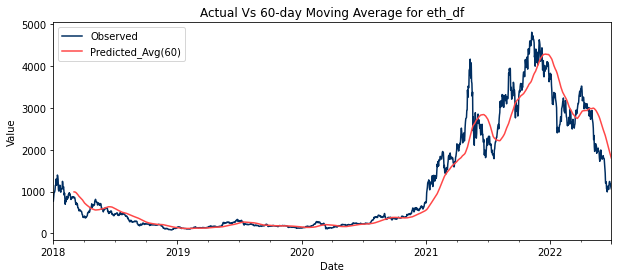

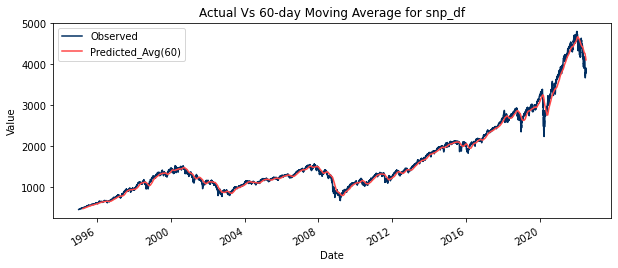

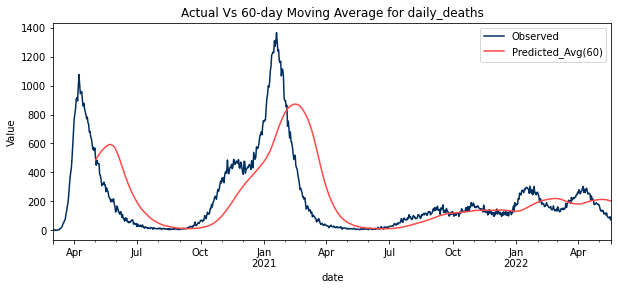

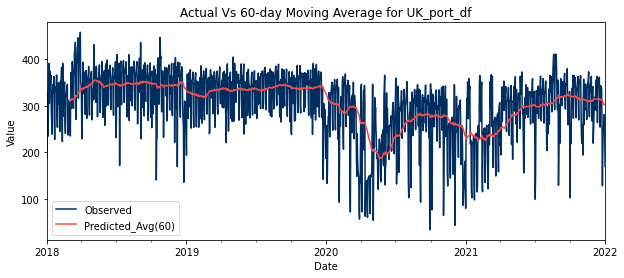

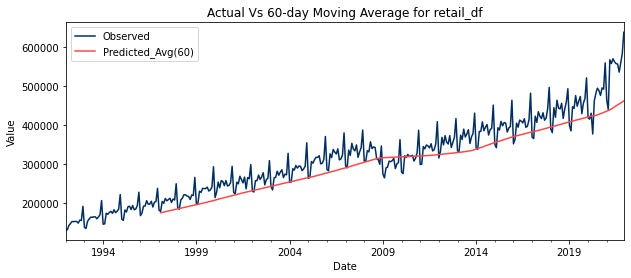

In [64]:
for df in [hwg_df, eth_df, snp_df, daily_deaths, UK_port_df, retail_df]:
    set_figsize(10, 4)
    predict_avg(df, 'Observed', 60)
    df[['Observed', 'Predicted_Avg(60)']].plot()
    plt.title("Actual Vs 60-day Moving Average for %s" % [x for x in globals() if globals()[x] is df][0])
    plt.ylabel('Value')
    
set_figsize(13, 8)

As you can see, this has removed the detailed peaks and troughs of the data, but has maintained the overall trend by creating a smoother line overall. We may be able to optimise the period we take a moving average over for each dataset to get the best balance of maintain the trend and smoothing the data points, as 60 does not seem optimum for some but is sufficient for most.

### 6.1.2 Exponential Smoothing
Another way to smooth time series data, it is to use exponential smoothing. A function to do this is below.

#### Expontential Smoothing Function

In [65]:
def exp_smooth(data, alpha):
    smoothed_value = data[0]
    results = []
    for value in data:
        smoothed_value = (1 - alpha) * smoothed_value + alpha * value
        results.append(smoothed_value)
    return results

No we have the function lets plot this smoothing on the same data as we did above. As the below graphs show, this technique performs similarly to the above and likewise can be optimised, this time with differing values of alpha. The lower the value of alpha, the more closly the smoothed line will follow the data points, and vice versa. We have used a value of 0.05 for alpha for now, which works well for some and not as much for others where it doesn't reduce enough of the datas variance. For further use this will be optimised for each applicable dataset.

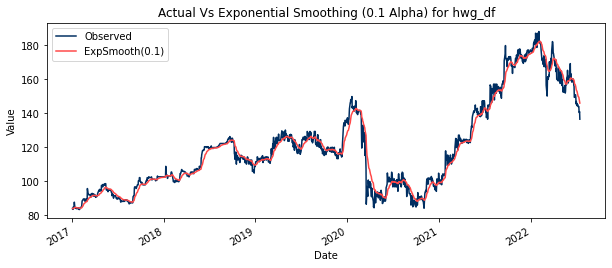

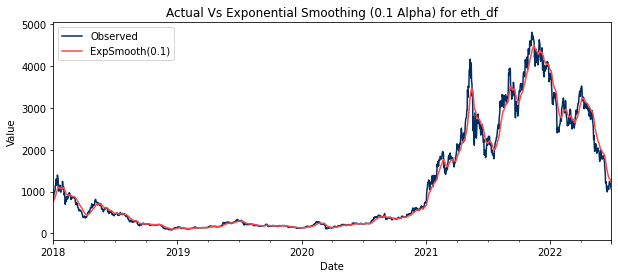

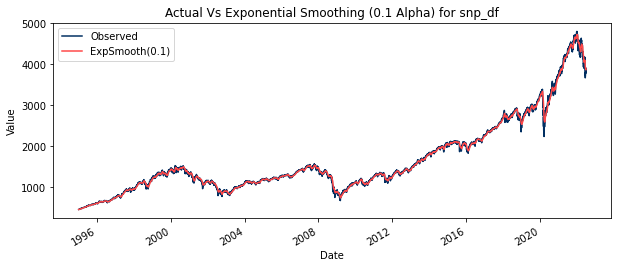

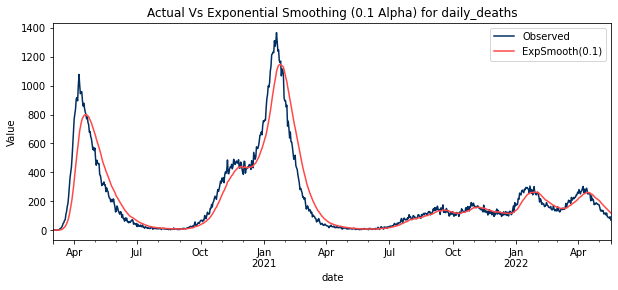

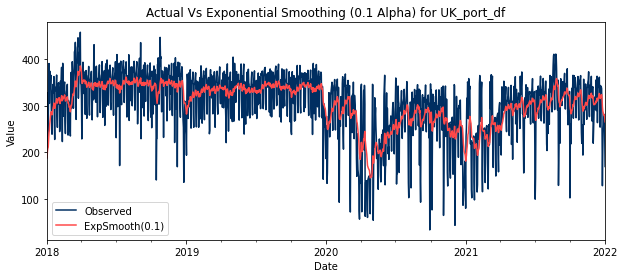

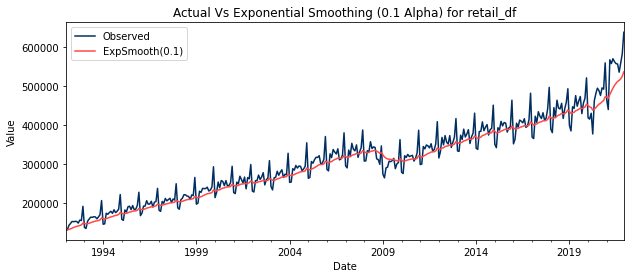

In [66]:
for df in [hwg_df, eth_df, snp_df, daily_deaths, UK_port_df, retail_df]:
    set_figsize(10, 4)
    df['ExpSmooth(0.1)'] = exp_smooth(df['Observed'], 0.1)
    df[['Observed', 'ExpSmooth(0.1)']].plot()
    plt.title("Actual Vs Exponential Smoothing (0.1 Alpha) for %s" % [x for x in globals() if globals()[x] is df][0])
    plt.ylabel('Value')
    
set_figsize(13, 8)

## 6.2 Residue
Now we know how to decompose the trend from a dataset, we need to deal with what we call the 'residue' which is the differences between the smoothed trend line and the actual values. To deal with this data in a useful manner, we will find the differences column for the Residue column once created, in order to make the residue data stationary.

### 6.2.1 Ethereum - Residue Differences
We will show this on the Ethereum data using the exponential smoothing values we created previously, as the 0.1 alpha value gave us a good trend line to work with.

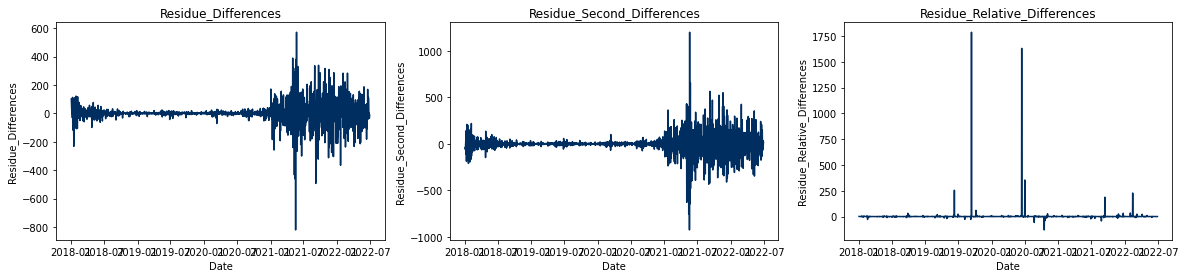

P-Value (Residue) -  0.000000599157348
P-Value (Residue_Differences) -  0.000000000000000
P-Value (Residue_Second_Differences) -  0.000000000000000
P-Value (Residue_Relative_Differences) -  0.000000000000000


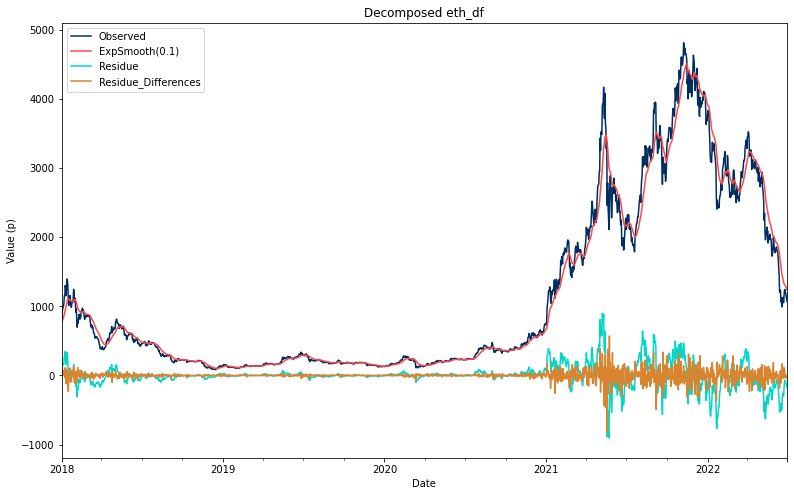

In [67]:
eth_df['Residue'] = eth_df['Observed'] - eth_df['ExpSmooth(0.1)']
calc_diff_columns(eth_df, 'Residue', ['d', 'sd', 'rd'])
eth_df[['Observed', 'ExpSmooth(0.1)', 'Residue', 'Residue_Differences']].plot()
plt.title('Decomposed eth_df')
plt.ylabel('Value (p)')
plt.show()

As the graph shows below we have have the 2 decomposed parts, (trend in red, residue diff in orange). The residue, as shwon by the P-values, was actually already stationary, but we have increased its stationarity significantly with the differences column.

## 6.3 Analysis & Recomposition
Now we have the data decomposed, we can apply appropriate models to each part and then add these difference predictions together to get back to a final prediction.

### 6.3.1 AutoRegression for Stationary Residue Differences
Now we have a stationary part of our data, we should be able to use AR(p) in order to get a good predictive model for this.
Again, we shall continue to use Ethereum data.

The PACF below for the Residue Differences doesn't show any obvious value for P. We shall therefore randomly select 12, as it is one the bars that seems to pertrude the most.

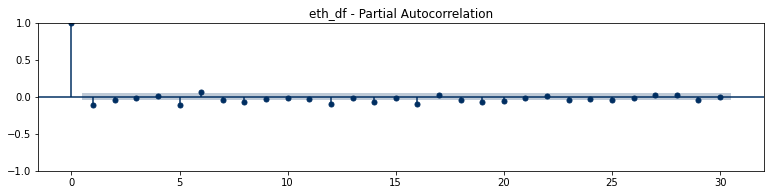

In [68]:
fig = plt.figure(figsize=(13,6))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(eth_df['Residue_Differences'][1:], lags=30, ax=ax1,
                                title="eth_df - Partial Autocorrelation")

Hence, we use the AR(12) on the residue differences, then add these predictions back to the residue to get our predicted residue values.

In [69]:
eth_df = eth_df.dropna()
coeffs = train_ar(eth_df, 'Residue_Differences', 12)
eth_df['Predicted_AR(12)'] = predict(eth_df, 'Residue_Differences', coeffs)
residue_prediction = eth_df['Predicted_AR(12)'] + eth_df['Residue'].shift()

### 6.3.2 Differences Averages on Trend Data
Now we will use the differences average function we formed earlier to get predictions for the trend part of our decomposed data. This is take the average difference of the last 2 records and add this average difference to the previous value to get the predicted value.

In [70]:
predict_diff_avg(eth_df, 'ExpSmooth(0.1)', 1)

### 6.3.3 Recomposition
Now we can add these trend predictions and residue predictions back together to form our final predictions, then compare this to our actual values.

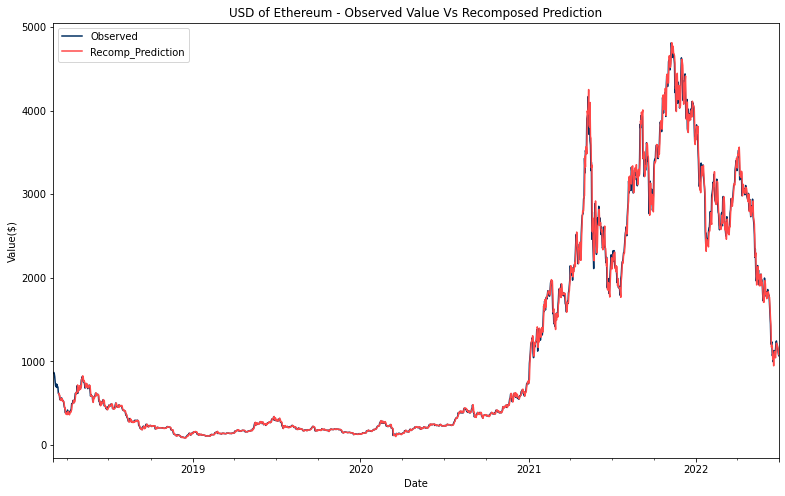

In [71]:
eth_df['Recomp_Prediction'] = eth_df['Predicted_DiffAvg(1)'] + residue_prediction

eth_df[['Observed', 'Recomp_Prediction']].plot()
plt.title('USD of Ethereum - Observed Value Vs Recomposed Prediction')
plt.ylabel('Value($)')
plt.show()

In [72]:
RMSE = assess_predictions(eth_df, 'Observed', 'Recomp_Prediction')[1]
add_error_col(errors_df, 'Exp_Decomp', 'eth_df', RMSE)

Naive    S_Naive        Avg   Diff_Avg      AR(p)  \
hwg_df            2.506        NaN      2.580      2.557      2.455   
eth_df           81.470        NaN     88.563     81.888        NaN   
snp_df           21.775        NaN     23.260     22.072        NaN   
daily_deaths     24.850        NaN     27.784     23.603     22.165   
UK_port_df       61.638     74.931     56.702     62.113     48.224   
retail_df     33150.678  24153.515  26096.751  33637.869  15517.411   

              Exp_Decomp Best Alg  
hwg_df               NaN    AR(p)  
eth_df             81.99    Naive  
snp_df               NaN    Naive  
daily_deaths         NaN    AR(p)  
UK_port_df           NaN    AR(p)  
retail_df            NaN    AR(p)

It is clear that this has given a comparable prediction to other models, however, this simple Exponential decomposition hasn't produced the best predictive model so far as it comes in 3rd best so far for this dataset. Nowe we will look at a Lowess decomposition on the same dataset and see how it compares.

## 6.4 Lowess Decomposition
We will now use Lowess to produce our smoothed data, as this will be used in more advanced models as it is seen as superior to the other types of smoothing.

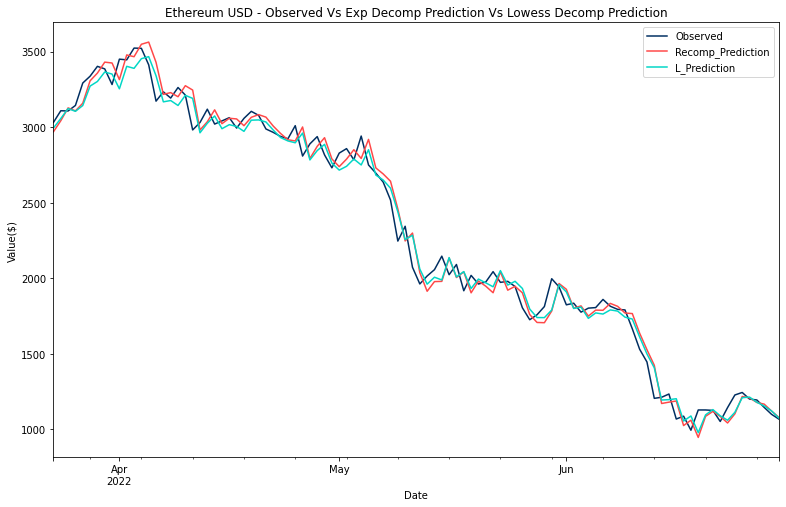

Naive    S_Naive        Avg   Diff_Avg      AR(p)  \
hwg_df            2.506        NaN      2.580      2.557      2.455   
eth_df           81.470        NaN     88.563     81.888        NaN   
snp_df           21.775        NaN     23.260     22.072        NaN   
daily_deaths     24.850        NaN     27.784     23.603     22.165   
UK_port_df       61.638     74.931     56.702     62.113     48.224   
retail_df     33150.678  24153.515  26096.751  33637.869  15517.411   

              Exp_Decomp  Low_Decomp    Best Alg  
hwg_df               NaN         NaN       AR(p)  
eth_df             81.99      76.765  Low_Decomp  
snp_df               NaN         NaN       Naive  
daily_deaths         NaN         NaN       AR(p)  
UK_port_df           NaN         NaN       AR(p)  
retail_df            NaN         NaN       AR(p)

In [73]:
eth_df['Lowess_Smoothed'] = lowess(eth_df['Observed'], eth_df.index, frac=0.03)[:,1]
eth_df['L_Residue'] = eth_df['Observed'] - eth_df['Lowess_Smoothed']

eth_AR = sm.tsa.AutoReg(eth_df.reset_index()['L_Residue'], lags = 12).fit()
res_prediction = eth_AR.predict()
res_prediction.index = eth_df.index

trend_prediction = 2 * eth_df['Lowess_Smoothed'].shift(1) - eth_df['Lowess_Smoothed'].shift(2) # naive differences
prediction = trend_prediction + res_prediction
eth_df['L_Prediction'] = prediction 

eth_df[['Observed', 'Recomp_Prediction', 'L_Prediction']][-100:].plot()
plt.title('Ethereum USD - Observed Vs Exp Decomp Prediction Vs Lowess Decomp Prediction')
plt.ylabel('Value($)')
plt.show()

RMSE = assess_predictions(eth_df, 'Observed', 'L_Prediction')[1]
add_error_col(errors_df, 'Low_Decomp', 'eth_df', RMSE)

As can be seen, this is an improvement upon the Exponential Decomposition as we have a smaller RMSE. However, it is clear this can still be optimised, prehaps with different values for p in AR(p) and we did not take differences to get greater stationarity in our residue data. Improvements like these will likely wield a better result. 

## 6.5 Tackling Seasonality

### 6.5.1 FFT
Now we will use Fast Fourier Transforms to determine seasonality in our data - we expect to see seasonaility in our retail data but not anywhere else. Let's test that below.

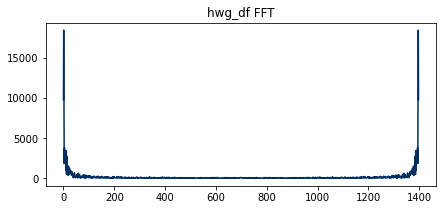

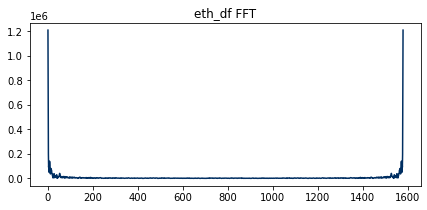

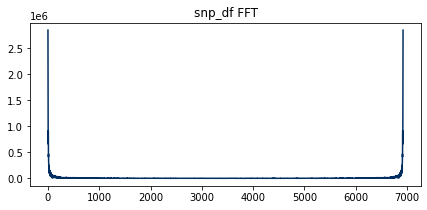

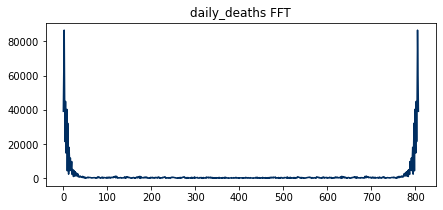

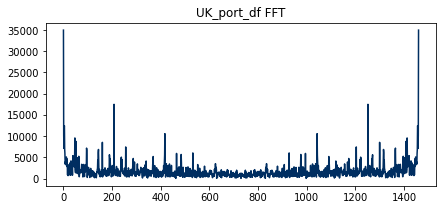

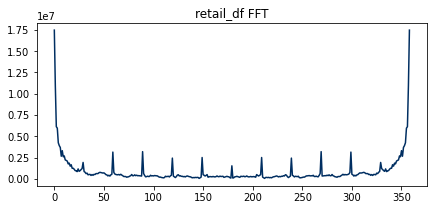

In [74]:
set_figsize(7, 3)
for df in [hwg_df, eth_df, snp_df, daily_deaths, UK_port_df, retail_df]:
    df_fft = np.abs(np.fft.fft((df['Observed'])))[1:len(df)]
    plt.plot(df_fft)
    plt.title('%s FFT' % [x for x in globals() if globals()[x] is df][0])
    plt.show()
set_figsize(13, 8)

This identifies that the retail data is our only obviously seasonal data, with seasonailty period of around 12 (once a year) with a spike at every interval of 30 out of our 360 records.

We will therefore use this for our seasonal lowess trend decomposition predictions.

### 6.5.2 Seasonal Lowess Trend Decomposition (STL)
For this we will utilise the statsmodels STL function, which helps us decompose our seasonal data using Lowess in a much more concise way.

#### Decomposition

In [75]:
retail_STL = STL(retail_df['Observed']).fit()

retail_trend = retail_STL.trend
retail_seasonal = retail_STL.seasonal
retail_resid = retail_STL.resid

#### Trend

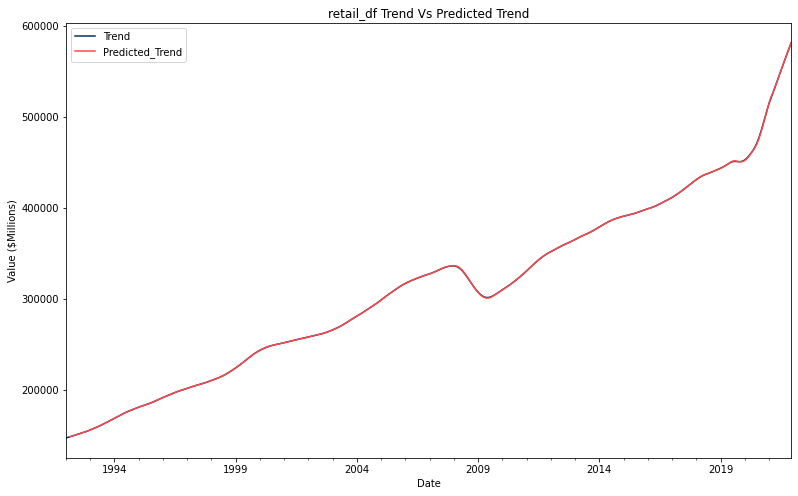

In [76]:
predicted_trend = 2 * retail_trend.shift(1) - retail_trend.shift(2)
retail_df_trend = pd.DataFrame({'Trend':retail_trend, 'Predicted_Trend':predicted_trend})
#retail_df_trend = retail_df_trend.dropna()

retail_df_trend.plot()
plt.title('retail_df Trend Vs Predicted Trend')
plt.ylabel('Value ($Millions)')
plt.show()

#### Seasonal

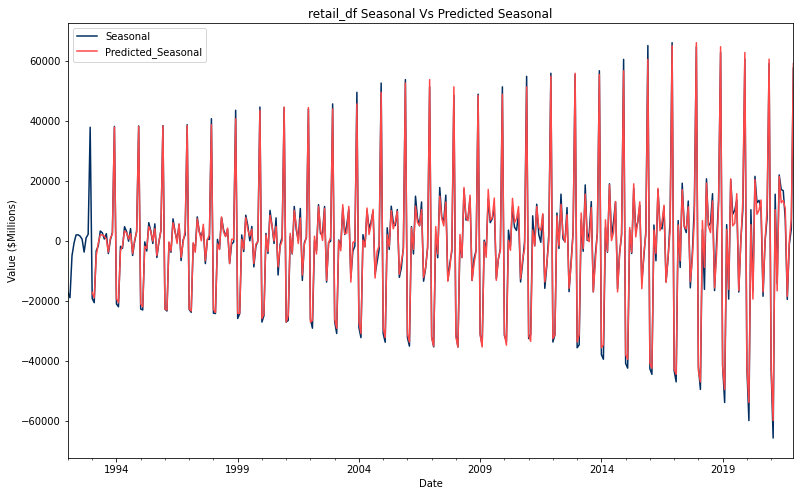

In [77]:
predicted_seasonal = retail_seasonal.shift(12)
retail_df_seasonal = pd.DataFrame({'Seasonal':retail_seasonal, 'Predicted_Seasonal':predicted_seasonal})
#retail_df_seasonal = retail_df_seasonal.dropna()

retail_df_seasonal.plot()
plt.title('retail_df Seasonal Vs Predicted Seasonal')
plt.ylabel('Value ($Millions)')
plt.show()

#### Residue

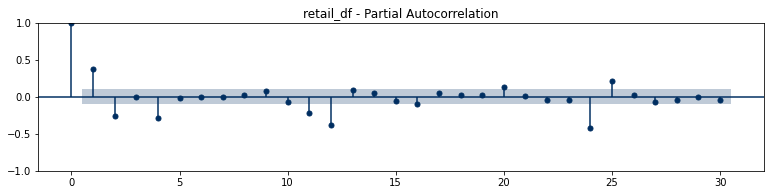

In [78]:
fig = plt.figure(figsize=(13,6))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(retail_resid, lags=30, ax=ax1,
                                title="retail_df - Partial Autocorrelation")

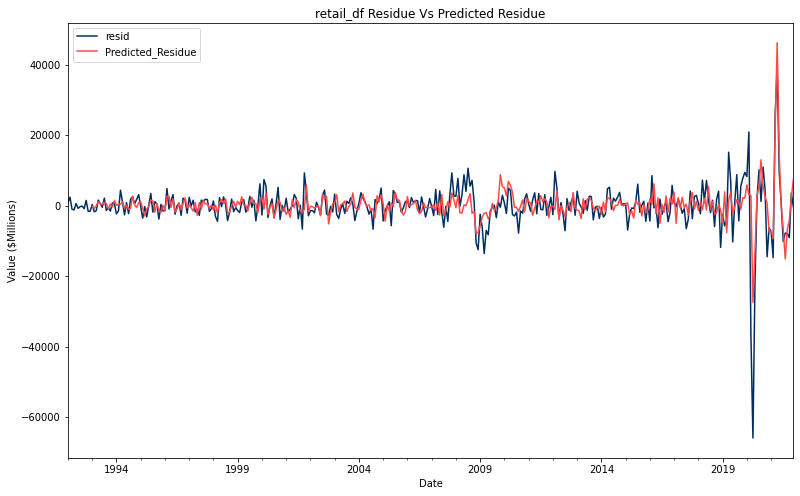

In [79]:
retail_df_resid = pd.DataFrame(retail_resid)
coeffs = train_ar(retail_df_resid, 'resid', 12)
retail_df_resid['Predicted_Residue'] = predict(retail_df_resid, 'resid', coeffs)


retail_df_resid.plot()
plt.title('retail_df Residue Vs Predicted Residue')
plt.ylabel('Value ($Millions)')
plt.show()

#### Recomposition

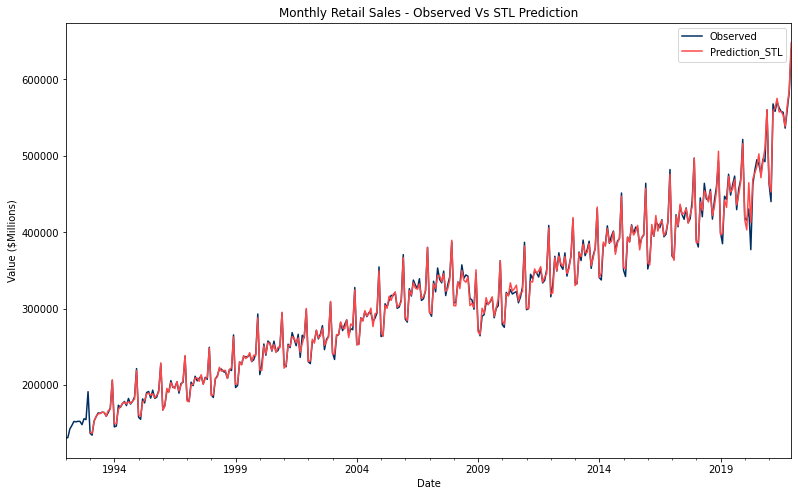


Trend RMSE: 197.427
Seasonal RMSE: 2036.599
Residue RMSE: 3761.97
Combined RMSE: 5136.946



Naive    S_Naive        Avg   Diff_Avg      AR(p)  \
hwg_df            2.506        NaN      2.580      2.557      2.455   
eth_df           81.470        NaN     88.563     81.888        NaN   
snp_df           21.775        NaN     23.260     22.072        NaN   
daily_deaths     24.850        NaN     27.784     23.603     22.165   
UK_port_df       61.638     74.931     56.702     62.113     48.224   
retail_df     33150.678  24153.515  26096.751  33637.869  15517.411   

              Exp_Decomp  Low_Decomp  STL_Decomp    Best Alg  
hwg_df               NaN         NaN         NaN       AR(p)  
eth_df             81.99      76.765         NaN  Low_Decomp  
snp_df               NaN         NaN         NaN       Naive  
daily_deaths         NaN         NaN         NaN       AR(p)  
UK_port_df           NaN         NaN         NaN       AR(p)  
retail_df            NaN         NaN    5136.946  STL_Decomp

In [80]:
trend_RMSE = assess_predictions(retail_df_trend, 'Trend', 'Predicted_Trend')[1]
seasonal_RMSE = assess_predictions(retail_df_seasonal, 'Seasonal', 'Predicted_Seasonal')[1]
resid_RMSE = assess_predictions(retail_df_resid, 'resid', 'Predicted_Residue')[1]

df = pd.concat([retail_df_trend, retail_df_seasonal, retail_df_resid], axis=1)

retail_df['Prediction_STL'] = df['Predicted_Trend'] + df['Predicted_Seasonal'] + df['Predicted_Residue']
retail_df[['Observed', 'Prediction_STL']].plot()
plt.title('Monthly Retail Sales - Observed Vs STL Prediction')
plt.ylabel('Value ($Millions)')
plt.show()

combined_RMSE = assess_predictions(retail_df, 'Observed', 'Prediction_STL')[1]
print('''
Trend RMSE: %s
Seasonal RMSE: %s
Residue RMSE: %s
Combined RMSE: %s
''' % (round(trend_RMSE, 3), round(seasonal_RMSE, 3), round(resid_RMSE, 3), round(combined_RMSE, 3)))

add_error_col(errors_df, 'STL_Decomp', 'retail_df', combined_RMSE)

As you can see from the results above - this technique massively improves our predictions for the seasonal retail sales dataset, with it having a RMSE 5 times smaller than the next best algorithm tested on it so far.

### 6.5.3 Monte Carlo Methods on STL_Decomp
Now, lets try to apply Monte Carlo methods to each part and see if we can get a tighter spread of future results.

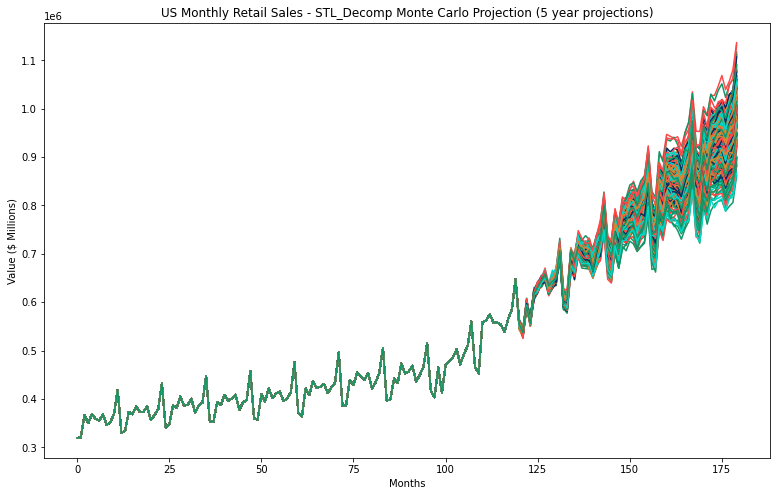

In [83]:
num_samples = 200
trend_trajectories = np.broadcast_to(retail_df_trend['Predicted_Trend'].to_numpy().
                                     reshape((-1, 1)), (len(retail_df_trend['Predicted_Trend']), num_samples))

seasonal_trajectories = np.broadcast_to(retail_df_seasonal['Predicted_Seasonal'].to_numpy().
                                        reshape((-1,1)), (len(retail_df_seasonal['Predicted_Seasonal']), num_samples))

resid_trajectories = np.broadcast_to(retail_df_resid['Predicted_Residue'].to_numpy().
                                     reshape((-1, 1)), (len(retail_df_resid['Predicted_Residue']), num_samples))

for i in range(60):
    trend_prediction = 2 * trend_trajectories[-1,:] - trend_trajectories[-2,:]
    next_trend_row = trend_prediction + trend_RMSE * np.random.randn(num_samples)
    trend_trajectories = np.append(trend_trajectories, next_trend_row.reshape((1,num_samples)), axis=0)
    
    seasonal_prediction = seasonal_trajectories[-12,:]
    next_seasonal_row = seasonal_prediction + seasonal_RMSE * np.random.randn(num_samples)
    seasonal_trajectories = np.append(seasonal_trajectories, next_seasonal_row.reshape((1,num_samples)), axis=0)
    
    resid_prediction = coeffs @ resid_trajectories[-len(coeffs):,:]
    next_resid_row = resid_prediction + resid_RMSE * np.random.randn(num_samples)
    resid_trajectories = np.append(resid_trajectories, next_resid_row.reshape((1,num_samples)), axis=0)
    
trajectories = trend_trajectories + seasonal_trajectories + resid_trajectories
plt.plot(trajectories[-180:,:])
plt.title('US Monthly Retail Sales - STL_Decomp Monte Carlo Projection (5 year projections)')
plt.ylabel('Value ($ Millions)')
plt.xlabel('Months')
plt.savefig('US Retail Sales STL Decomp Monte Carlo Simulation (5y).png')
plt.show()

This method has allowed us to greatly improve the RMSE and hence, the resulting Monte Carlo simulations on this data set has a tighter spread, and hence should have more accurate predicting power for longer-term future values. A small exploration of the KDE and range probablilites are below. As can be seen the seasonality and more acurate predicitions reduce the normality of the distrubtion due to the projections being more weighted by each component; the trend, seasonality and residue, but this also should allow us to put more trust in the future probablilities as the significantly reduced RMSE means we get a tighter spread that seems to fall more in line with the previous projections.

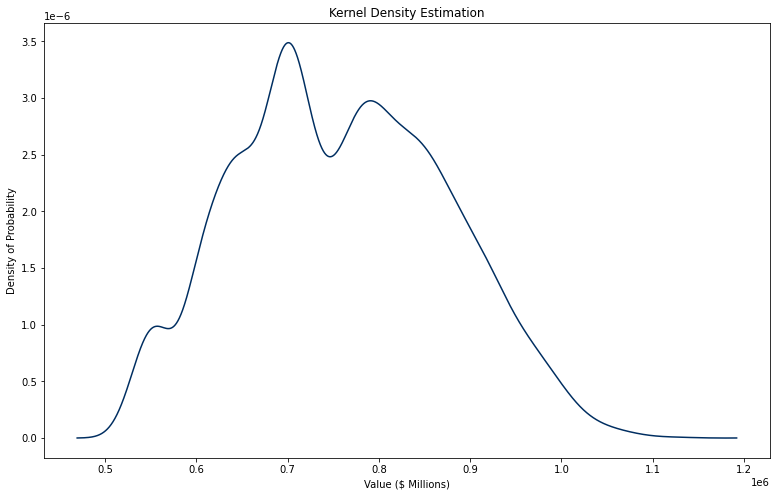

Probability of having a future value lying between 500,000 and 800,000- 0.6237
Probability of having a future value above threshold of 900,000 - 0.11


In [84]:
graph_KDE(trajectories[-60:].reshape(-1), 'Value ($ Millions)')
print('Probability of having a future value lying between 500,000 and 800,000- ' + 
      str(prob_between(trajectories[-60:], 500_000, 800_000)))
print('Probability of having a future value above threshold of 900,000 - ' + 
      str(threshold(900_000, trajectories[-60:], num_samples, 'above')))

***
# 7. ARIMA Modelling
***
***

ARIMA modelling is a combination of using AutoRegression, using differences to stationate the data, and moving averages, where the AR and MA periods can be optimised. It is useful to use ACF+PACF for these decisions. It is also important for this prediction method to find out how many differences need to be taken in order to make the data stationary. For this we will utilise the adfuller algorithm to find the P-values like we have previously. 

## 7.1 ARMA & ARIMA

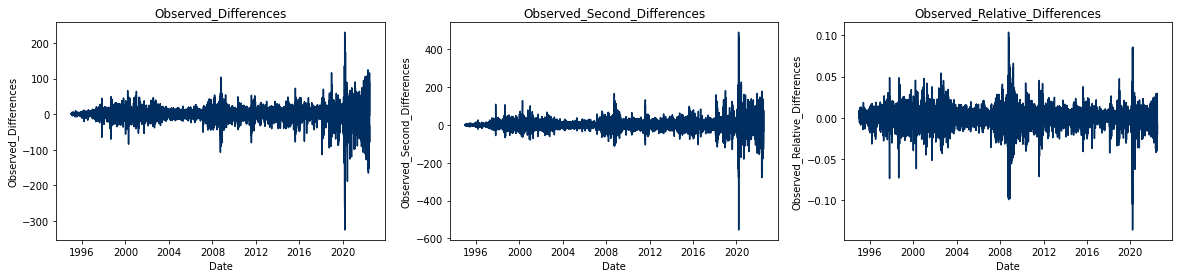

P-Value (Observed) -  0.980473332411334
P-Value (Observed_Differences) -  0.000000000000000
P-Value (Observed_Second_Differences) -  0.000000000000000
P-Value (Observed_Relative_Differences) -  0.000000000000000


In [85]:
calc_diff_columns(snp_df, 'Observed', ['d', 'sd', 'rd'])

As the above shows, the P-Values from the adfuller test are sufficiently small (<0.05) on the first differences column so we shall use 1 differences column for the ARIMA analysis. Now we must determine the AR and MA parameters.

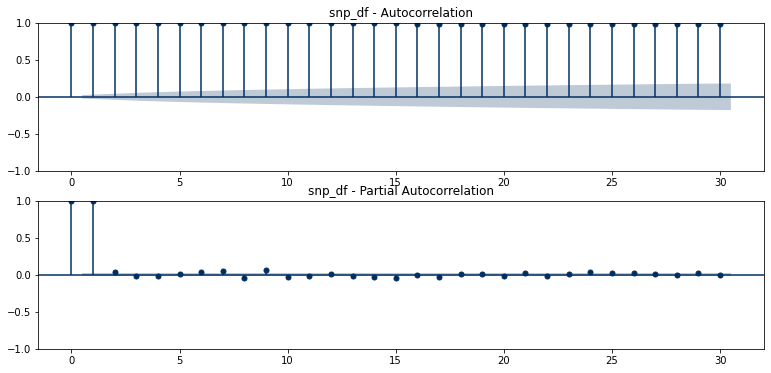

In [86]:
series = snp_df['Observed']
fig = plt.figure(figsize=(13,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series, lags=30, ax=ax1,
                                title="snp_df - Autocorrelation")
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series, lags=30, ax=ax2,
                                title="snp_df - Partial Autocorrelation")

The ACF doesn't slope off significantly, suggesting MA wouldn't aid the predictions here, and the PACF only has a peak at 1 so this is what we will use for the AR(p).

We will first do this manually and without using a differences column (ARMA) to then compare to using differences (ARIMA).

### 7.1.1 ARMA

In [87]:
ar_deg= 1
ma_deg = 0
coef = np.append(train_ar(series, _, ar_deg), np.zeros(ma_deg))
for x in range(100):
    design_matrix_rows = []
    errors = np.zeros(len(series))
    for i in range(max(ar_deg, ma_deg), len(series)):
        values = np.append(series[i-ar_deg:i], errors[i-ma_deg:i])
        pred = np.dot(values, coef)
        design_matrix_rows.append(values)
        errors[i] = series[i] - pred
    design_matrix = np.array(design_matrix_rows)
    coef = linear_regression(design_matrix, series[max(ar_deg, ma_deg):])
    if (x % 10) == 0:
        print("step", x, ":", math.sqrt(np.dot(errors, errors)/(len(errors) - max(ar_deg, ma_deg))))

step 0 : 21.771265658959738
step 10 : 21.771265658959738
step 20 : 21.771265658959738
step 30 : 21.771265658959738
step 40 : 21.771265658959738
step 50 : 21.771265658959738
step 60 : 21.771265658959738
step 70 : 21.771265658959738
step 80 : 21.771265658959738
step 90 : 21.771265658959738


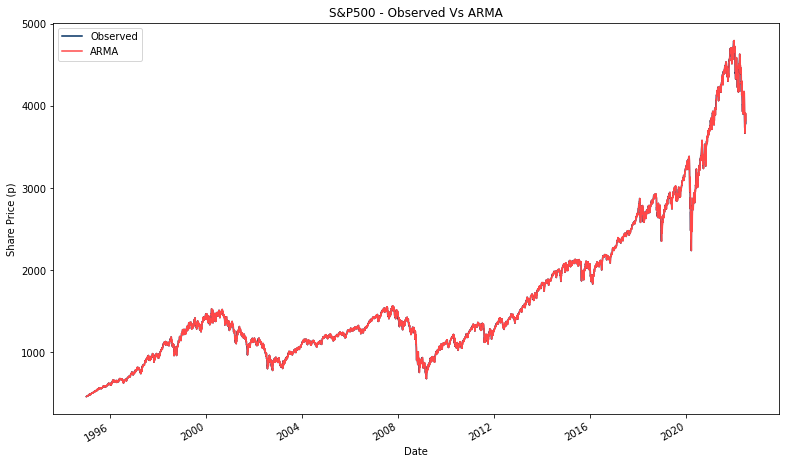

Naive    S_Naive        Avg   Diff_Avg      AR(p)  \
hwg_df            2.506        NaN      2.580      2.557      2.455   
eth_df           81.470        NaN     88.563     81.888        NaN   
snp_df           21.775        NaN     23.260     22.072        NaN   
daily_deaths     24.850        NaN     27.784     23.603     22.165   
UK_port_df       61.638     74.931     56.702     62.113     48.224   
retail_df     33150.678  24153.515  26096.751  33637.869  15517.411   

              Exp_Decomp  Low_Decomp  STL_Decomp    ARMA    Best Alg  
hwg_df               NaN         NaN         NaN     NaN       AR(p)  
eth_df             81.99      76.765         NaN     NaN  Low_Decomp  
snp_df               NaN         NaN         NaN  21.771        ARMA  
daily_deaths         NaN         NaN         NaN     NaN       AR(p)  
UK_port_df           NaN         NaN         NaN     NaN       AR(p)  
retail_df            NaN         NaN    5136.946     NaN  STL_Decomp

In [88]:
manual_ARMA = predict(series,_, coef)
manual_df_ARMA = pd.DataFrame({'Observed':series, 'ARMA':manual_ARMA})
manual_df_ARMA.plot()
plt.title('S&P500 - Observed Vs ARMA')
plt.ylabel('Share Price (p)')
plt.show()

RMSE = assess_predictions(manual_df_ARMA, 'Observed', 'ARMA')[1]
add_error_col(errors_df, 'ARMA', 'snp_df', RMSE)

ARMA now seems to be the best method so far for this dataset. Now lets implement ARIMA to see if we can make an improvement.

### 7.1.2 ARIMA

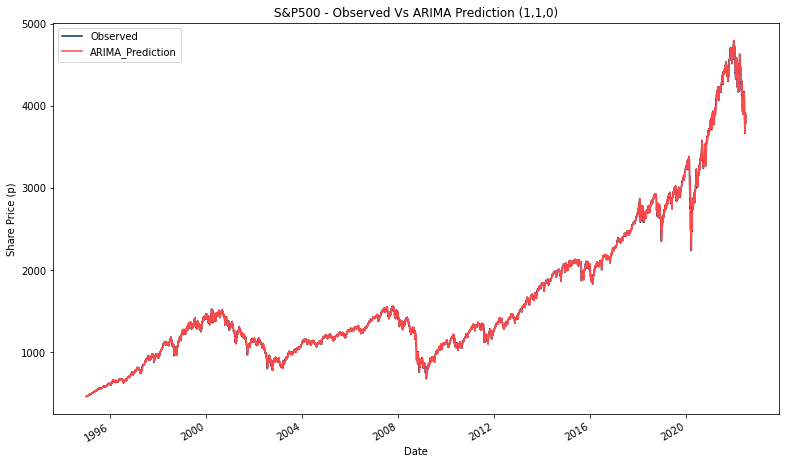

Naive    S_Naive        Avg   Diff_Avg      AR(p)  \
hwg_df            2.506        NaN      2.580      2.557      2.455   
eth_df           81.470        NaN     88.563     81.888        NaN   
snp_df           21.775        NaN     23.260     22.072        NaN   
daily_deaths     24.850        NaN     27.784     23.603     22.165   
UK_port_df       61.638     74.931     56.702     62.113     48.224   
retail_df     33150.678  24153.515  26096.751  33637.869  15517.411   

              Exp_Decomp  Low_Decomp  STL_Decomp    ARMA   ARIMA    Best Alg  
hwg_df               NaN         NaN         NaN     NaN     NaN       AR(p)  
eth_df             81.99      76.765         NaN     NaN     NaN  Low_Decomp  
snp_df               NaN         NaN         NaN  21.771  21.645       ARIMA  
daily_deaths         NaN         NaN         NaN     NaN     NaN       AR(p)  
UK_port_df           NaN         NaN         NaN     NaN     NaN       AR(p)  
retail_df            NaN         NaN    5136.946     NaN     NaN  STL_Decomp

In [90]:
ARIMA_model = sm.tsa.arima.ARIMA(series, order=(1,1,0), trend='n')
ARIMA_res = ARIMA_model.fit()
predicted_ARIMA = ARIMA_res.predict()

snp_df_ARIMA = pd.DataFrame({'Observed': series, 'ARIMA_Prediction': predicted_ARIMA})
snp_df_ARIMA[1:].plot()
plt.title('S&P500 - Observed Vs ARIMA Prediction (1,1,0)')
plt.ylabel('Share Price (p)')
plt.savefig('SP500 ARIMA Prediction.png')
plt.show()

RMSE = assess_predictions(snp_df_ARIMA[1:], 'Observed', 'ARIMA_Prediction')[1]
add_error_col(errors_df, 'ARIMA', 'snp_df', RMSE)

Although it is small - we can see an improvement between ARMA and ARIMA due to the increased stationarity provided during the analysis.


## 7.2 SARIMAX
A variation on ARIMA is the SARIMAX algorithm. This is a ARIMA algorithm modified to be suited for seasonal predictions and involves splitting the data out into its components and carrying out ARIMA analysis. It should improve the RMSE figure comapred to a normal ARIMA for such seasonally appropriate datasets.

### 7.2.1 Retail Data - SARIMAX

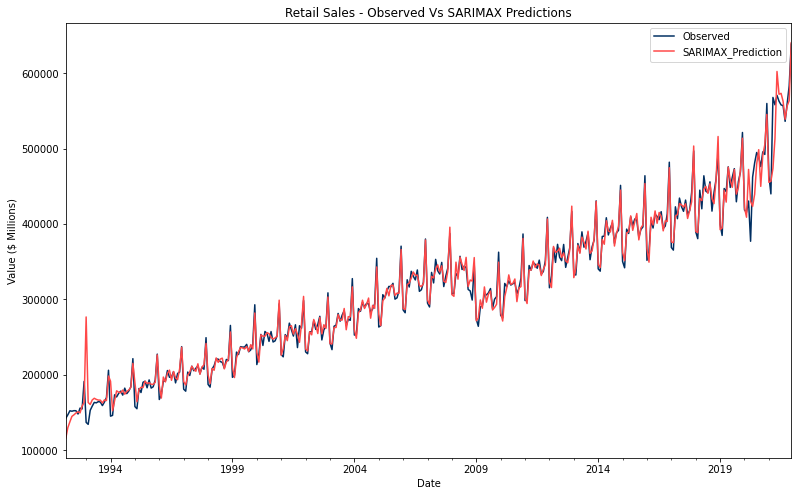

Naive    S_Naive        Avg   Diff_Avg      AR(p)  \
hwg_df            2.506        NaN      2.580      2.557      2.455   
eth_df           81.470        NaN     88.563     81.888        NaN   
snp_df           21.775        NaN     23.260     22.072        NaN   
daily_deaths     24.850        NaN     27.784     23.603     22.165   
UK_port_df       61.638     74.931     56.702     62.113     48.224   
retail_df     33150.678  24153.515  26096.751  33637.869  15517.411   

              Exp_Decomp  Low_Decomp  STL_Decomp    ARMA   ARIMA    SARIMAX  \
hwg_df               NaN         NaN         NaN     NaN     NaN        NaN   
eth_df             81.99      76.765         NaN     NaN     NaN        NaN   
snp_df               NaN         NaN         NaN  21.771  21.645        NaN   
daily_deaths         NaN         NaN         NaN     NaN     NaN        NaN   
UK_port_df           NaN         NaN         NaN     NaN     NaN        NaN   
retail_df            NaN         NaN    5136.946     NaN     NaN  13488.293   

                Best Alg  
hwg_df             AR(p)  
eth_df        Low_Decomp  
snp_df             ARIMA  
daily_deaths       AR(p)  
UK_port_df         AR(p)  
retail_df     STL_Decomp

In [92]:
model=sm.tsa.statespace.SARIMAX(retail_df['Observed'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
sarimax_df = pd.DataFrame({'Observed':retail_df['Observed'], 'SARIMAX_Prediction': np.NaN})
sarimax_df['SARIMAX_Prediction'] = results.predict()
sarimax_df[2:].plot()
plt.title('Retail Sales - Observed Vs SARIMAX Predictions')
plt.ylabel('Value ($ Millions)')
plt.savefig('Retail Sales SARIMAX Predictions.png')
plt.show()

RMSE = assess_predictions(sarimax_df, 'Observed', 'SARIMAX_Prediction')[1]
add_error_col(errors_df, 'SARIMAX', 'retail_df', RMSE)

It is clear from this analysis, for seasonal data it appears that STL Decomposition is the strongest algorithm, as it has by far the lowest RMSE.

# 8. Final Analysis - Filling Out errors_df

## 8.1 AR(p) Completions

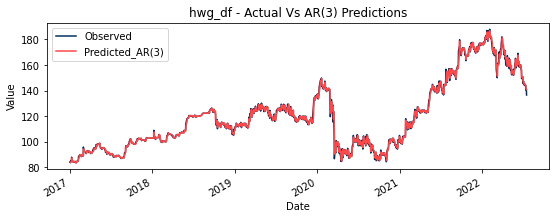

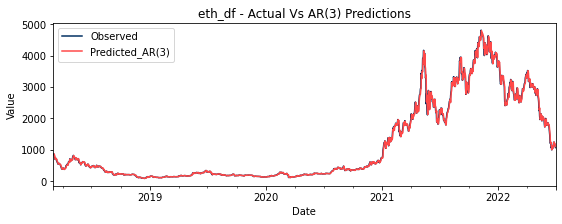

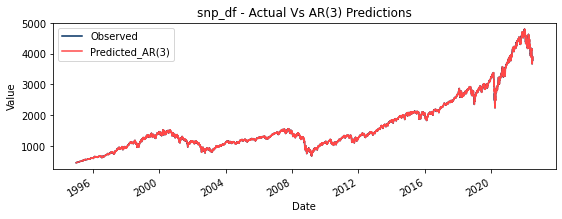

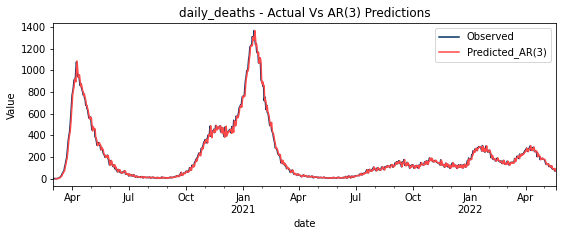

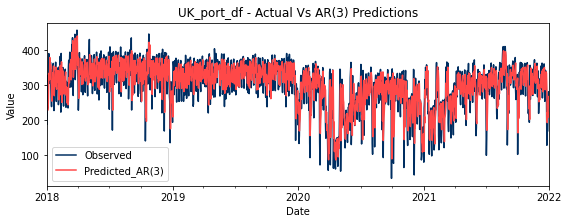

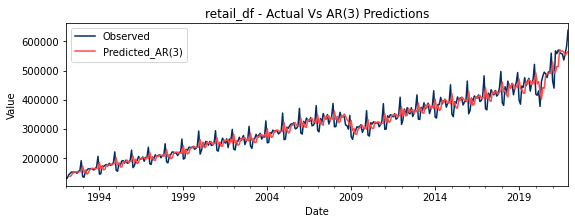

Naive    S_Naive        Avg   Diff_Avg      AR(p)  \
hwg_df            2.506        NaN      2.580      2.557      2.455   
eth_df           81.470        NaN     88.563     81.888     81.536   
snp_df           21.775        NaN     23.260     22.072     21.628   
daily_deaths     24.850        NaN     27.784     23.603     24.672   
UK_port_df       61.638     74.931     56.702     62.113     56.090   
retail_df     33150.678  24153.515  26096.751  33637.869  28167.797   

              Exp_Decomp  Low_Decomp  STL_Decomp    ARMA   ARIMA    SARIMAX  \
hwg_df               NaN         NaN         NaN     NaN     NaN        NaN   
eth_df             81.99      76.765         NaN     NaN     NaN        NaN   
snp_df               NaN         NaN         NaN  21.771  21.645        NaN   
daily_deaths         NaN         NaN         NaN     NaN     NaN        NaN   
UK_port_df           NaN         NaN         NaN     NaN     NaN        NaN   
retail_df            NaN         NaN    5136.946     NaN     NaN  13488.293   

                Best Alg  
hwg_df             AR(p)  
eth_df        Low_Decomp  
snp_df             AR(p)  
daily_deaths    Diff_Avg  
UK_port_df         AR(p)  
retail_df     STL_Decomp

In [93]:
set_figsize(9,3)
for df in [hwg_df, eth_df, snp_df, daily_deaths, UK_port_df, retail_df]:
    coeffs = train_ar(df, 'Observed', 3)
    df['Predicted_AR(3)'] = predict(df, 'Observed', coeffs)
    df[['Observed', 'Predicted_AR(3)']].plot()
    plt.title("%s - Actual Vs AR(3) Predictions" % [x for x in globals() if globals()[x] is df][0])
    plt.ylabel('Value')
    plt.show()

    RMSE = assess_predictions(df, 'Observed', 'Predicted_AR(3)')[1]
    add_error_col(errors_df, 'AR(p)', [x for x in globals() if globals()[x] is df][0], RMSE)
    
set_figsize(13,8)

cols_at_end = ['Best Alg']
errors_df = errors_df[[c for c in errors_df if c not in cols_at_end] 
                      + [c for c in cols_at_end if c in errors_df]]
errors_df[errors_df.columns[:-1]] = errors_df[errors_df.columns[:-1]].apply(pd.to_numeric)
errors_df['Best Alg'] = errors_df[errors_df.columns[:-1]].idxmin(axis='columns')
errors_df = round(errors_df, 3)
errors_df

## 8.3 Lowess Decomposition Completions

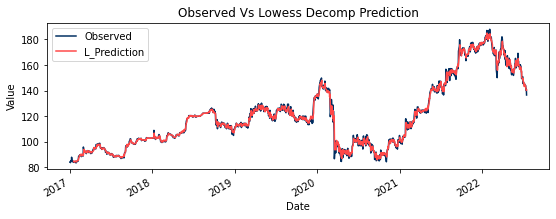

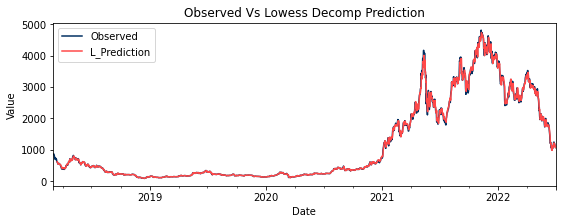

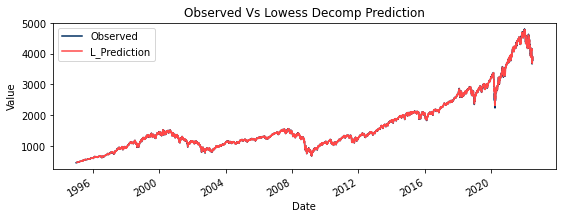

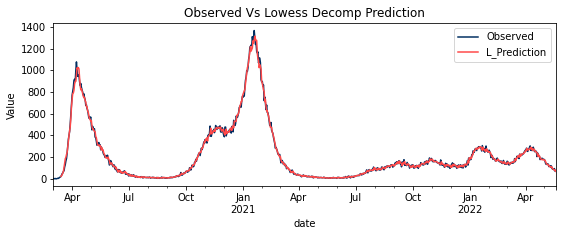

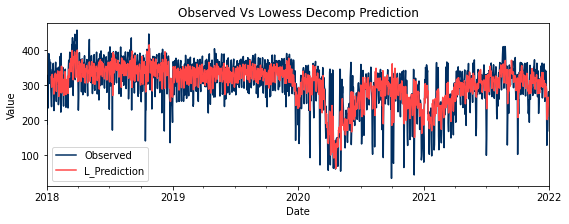

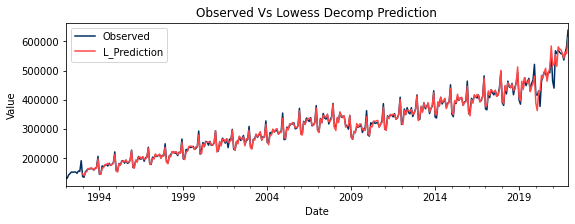

Naive    S_Naive        Avg   Diff_Avg      AR(p)  \
hwg_df            2.506        NaN      2.580      2.557      2.455   
eth_df           81.470        NaN     88.563     81.888     81.536   
snp_df           21.775        NaN     23.260     22.072     21.628   
daily_deaths     24.850        NaN     27.784     23.603     24.672   
UK_port_df       61.638     74.931     56.702     62.113     56.090   
retail_df     33150.678  24153.515  26096.751  33637.869  28167.797   

              Exp_Decomp  Low_Decomp  STL_Decomp    ARMA   ARIMA    SARIMAX  \
hwg_df               NaN       2.251         NaN     NaN     NaN        NaN   
eth_df             81.99      76.765         NaN     NaN     NaN        NaN   
snp_df               NaN      21.083         NaN  21.771  21.645        NaN   
daily_deaths         NaN      20.524         NaN     NaN     NaN        NaN   
UK_port_df           NaN      48.037         NaN     NaN     NaN        NaN   
retail_df            NaN   10185.235    5136.946     NaN     NaN  13488.293   

                Best Alg  
hwg_df        Low_Decomp  
eth_df        Low_Decomp  
snp_df        Low_Decomp  
daily_deaths  Low_Decomp  
UK_port_df    Low_Decomp  
retail_df     STL_Decomp

In [94]:
set_figsize(9,3)
for df in [hwg_df, eth_df, snp_df, daily_deaths, UK_port_df, retail_df]:

    df['Lowess_Smoothed'] = lowess(df['Observed'], df.index, frac=0.03)[:,1]
    df['L_Residue'] = df['Observed'] - df['Lowess_Smoothed']

    df_AR = sm.tsa.AutoReg(df.reset_index()['L_Residue'], lags = 12).fit()
    res_prediction = df_AR.predict()
    res_prediction.index = df.index

    trend_prediction = 2 * df['Lowess_Smoothed'].shift(1) - df['Lowess_Smoothed'].shift(2) # naive differences
    prediction = trend_prediction + res_prediction
    df['L_Prediction'] = prediction

    df[['Observed', 'L_Prediction']].plot()
    plt.title('Observed Vs Lowess Decomp Prediction')
    plt.ylabel('Value')
    plt.show()

    RMSE = assess_predictions(df, 'Observed', 'L_Prediction')[1]
    add_error_col(errors_df, 'Low_Decomp', [x for x in globals() if globals()[x] is df][0], RMSE)
    
cols_at_end = ['Best Alg']
errors_df = errors_df[[c for c in errors_df if c not in cols_at_end] 
                      + [c for c in cols_at_end if c in errors_df]]
errors_df[errors_df.columns[:-1]] = errors_df[errors_df.columns[:-1]].apply(pd.to_numeric)
errors_df['Best Alg'] = errors_df[errors_df.columns[:-1]].idxmin(axis='columns')
errors_df = round(errors_df, 3)    
    
set_figsize(13,8)
errors_df

## 8.4 ARIMA Completions

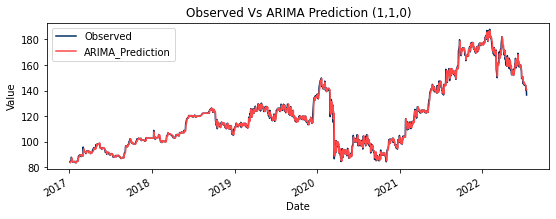

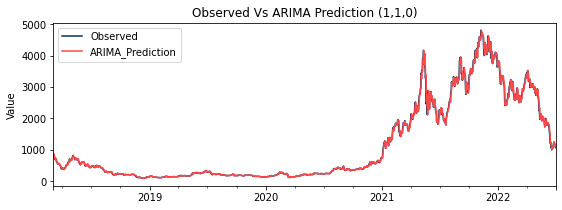

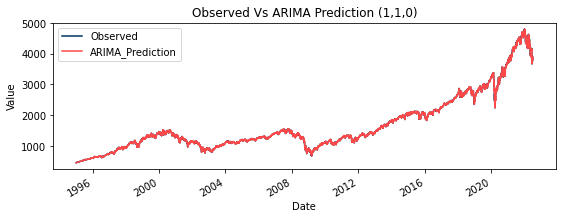

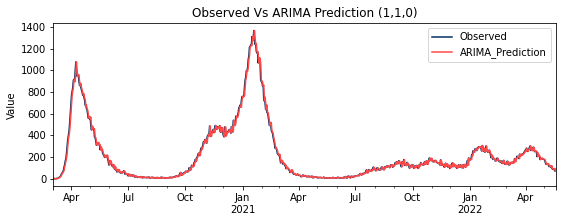

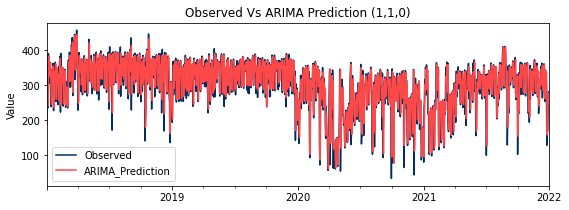

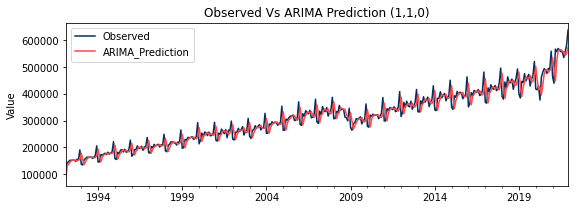

Naive    S_Naive        Avg   Diff_Avg      AR(p)  \
hwg_df            2.506        NaN      2.580      2.557      2.455   
eth_df           81.470        NaN     88.563     81.888     81.536   
snp_df           21.775        NaN     23.260     22.072     21.628   
daily_deaths     24.850        NaN     27.784     23.603     24.672   
UK_port_df       61.638     74.931     56.702     62.113     56.090   
retail_df     33150.678  24153.515  26096.751  33637.869  28167.797   

              Exp_Decomp  Low_Decomp  STL_Decomp    ARMA      ARIMA  \
hwg_df               NaN       2.251         NaN     NaN      2.460   
eth_df             81.99      76.765         NaN     NaN     81.513   
snp_df               NaN      21.083         NaN  21.771     21.645   
daily_deaths         NaN      20.524         NaN     NaN     24.835   
UK_port_df           NaN      48.037         NaN     NaN     60.026   
retail_df            NaN   10185.235    5136.946     NaN  30915.954   

                SARIMAX    Best Alg  
hwg_df              NaN  Low_Decomp  
eth_df              NaN  Low_Decomp  
snp_df              NaN  Low_Decomp  
daily_deaths        NaN  Low_Decomp  
UK_port_df          NaN  Low_Decomp  
retail_df     13488.293  STL_Decomp

In [95]:
set_figsize(9,3)
for df in [hwg_df, eth_df, snp_df, daily_deaths, UK_port_df, retail_df]:

    ARIMA_model = sm.tsa.arima.ARIMA(df['Observed'], order=(1,1,0), trend='n')
    ARIMA_res = ARIMA_model.fit()
    predicted_ARIMA = ARIMA_res.predict()

    df_ARIMA = pd.DataFrame({'Observed': df['Observed'], 'ARIMA_Prediction': predicted_ARIMA})
    df_ARIMA[1:].plot()
    plt.title('Observed Vs ARIMA Prediction (1,1,0)')
    plt.ylabel('Value')
    plt.show()

    RMSE = assess_predictions(df_ARIMA[1:], 'Observed', 'ARIMA_Prediction')[1]
    add_error_col(errors_df, 'ARIMA', [x for x in globals() if globals()[x] is df][0], RMSE)
    
cols_at_end = ['Best Alg']
errors_df = errors_df[[c for c in errors_df if c not in cols_at_end] 
                      + [c for c in cols_at_end if c in errors_df]]
errors_df[errors_df.columns[:-1]] = errors_df[errors_df.columns[:-1]].apply(pd.to_numeric)
errors_df['Best Alg'] = errors_df[errors_df.columns[:-1]].idxmin(axis='columns')
errors_df = round(errors_df, 3)    

    
set_figsize(13,8)
errors_df

I belive this allows us to draw a fair conclusion that Lowess Decomposition (and STL Decompostion for seasonal datasets) appears to be the most reliable way to forecast data. This is likely due to the segmented handling of the data enabling to do differing techniques for different data types in order to maximise the accuracy of each component. The STL for the retail data especially is significantly better performing than the next best which is SARIMAX, at nearly 1/3 of the RMSE and a 1/5 of the RMSE for the rest of the models.

Hence, this helps Monte Carlo simulations have a much tighter spread with the lower RMSE, allowing for more informed, reliable decisions to be made off the back of such analysis, much more so than the other models we have tested.

## 8.5 Trading Simulation Revisit
Lets revisit the trading simulation for a Lowess decomposition and compare the profits to the last attempt with Diff_Avg.

Your portfolio value is £42,836.22 (a profit of £32,836.22)


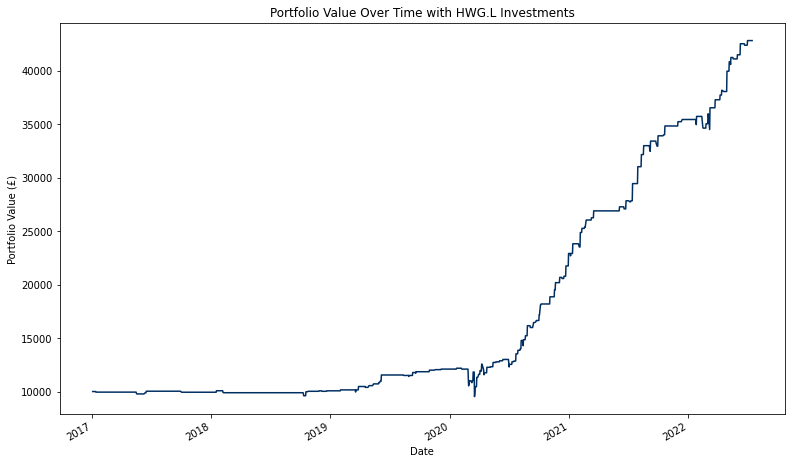

Your portfolio value is £746,855.70 (a profit of £736,855.70)


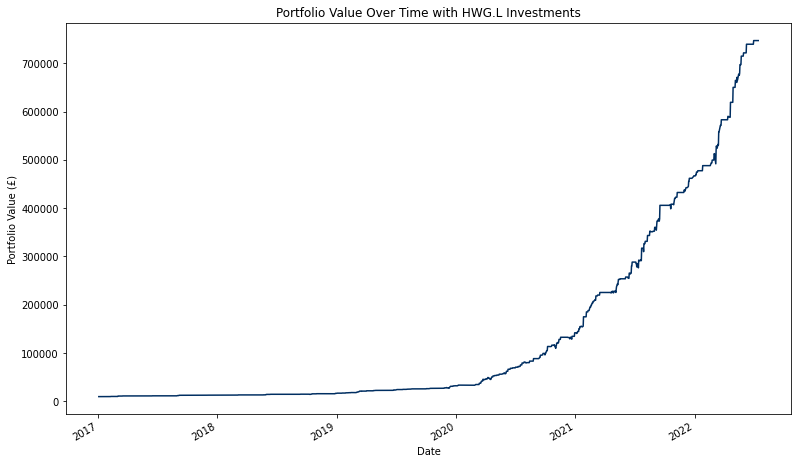

In [104]:
trading_simulation(hwg_df, 'Observed', 'Predicted_AR(3)', 10_000, 'HWG.L', 0.4, 'Portfolio Simulation HWG - AutoRegression(3)')
trading_simulation(hwg_df, 'Observed', 'L_Prediction', 10_000, 'HWG.L', 0.4, 'Portfolio Simulation HWG - Lowess Decompostion')

The power of the more accurate predictions here can be seen very clearly. A much more accurate prediction for the Lowess Predictions compared to the AR(3) model has resulted in a 2244% increase in profits, given all the same parameters.

***
# 9. Using XGBoost for Time Series Forecasting
***
***
A less traditional time series forecasting technnique is to use XGBoost. It is considered currently that univariate time series analysis and prediction works better with traditional approaches such as the ones explored above. Although sophisticated machine learning algorithms such as XGBoost can give a reasonable prediction for stationary data at least, it is still unlikely to match that of sophisticated traditional methods such as decomposition etc. We shall implement this below on our port data which is quite stationary to see if we can acheive a respectable prediction.
## 9.1 UK Port Activity

### 9.1.1 Train / Test Split

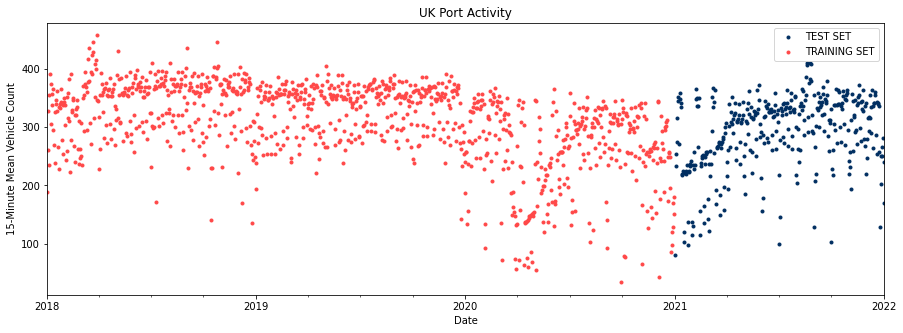

In [97]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

port_XG = UK_port_df['Observed'].copy().to_frame()
split_date = '2020-12-31'
port_XG_train = port_XG.loc[port_XG.index <= split_date].copy()
port_XG_test = port_XG.loc[port_XG.index > split_date].copy()

port_XG_test.rename(columns={'Observed': 'TEST SET'}) \
    .join(port_XG_train.rename(columns={'Observed': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='UK Port Activity', style='.')

plt.ylabel('15-Minute Mean Vehicle Count')
plt.show()

### 9.1.2 Create Features Function
This will allow the model to identify the importance of each drilled down aspect of our index, i.e. the date, day of week, day of year etc.

In [98]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

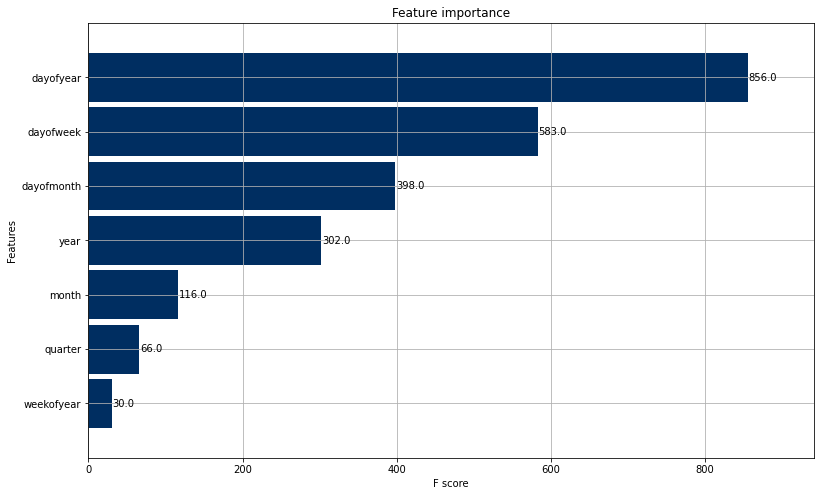

In [99]:
X_train, y_train = create_features(port_XG_train, label='Observed')
X_test, y_test = create_features(port_XG_test, label='Observed')

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False)

plot_importance(reg, height=0.9)
plt.show()

Now lets try to calculate our predictions using this model.

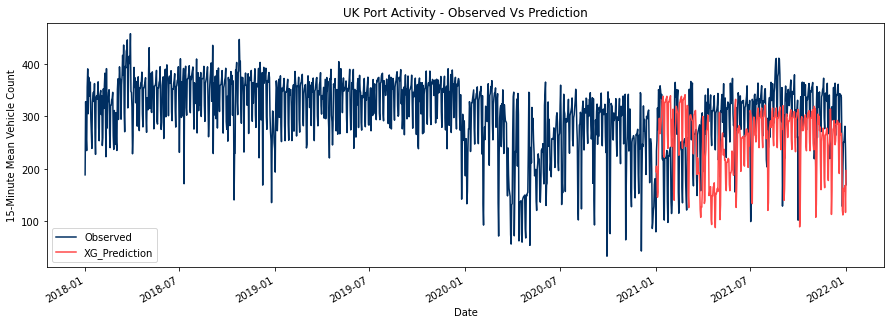

In [100]:
port_XG_test['XG_Prediction'] = reg.predict(X_test)
port_XG_ALL = pd.concat([port_XG_test, port_XG_train], sort=False)

port_XG_ALL[['Observed','XG_Prediction']].plot(figsize=(15, 5))
plt.title('UK Port Activity - Observed Vs Prediction')
plt.ylabel('15-Minute Mean Vehicle Count')
plt.show()

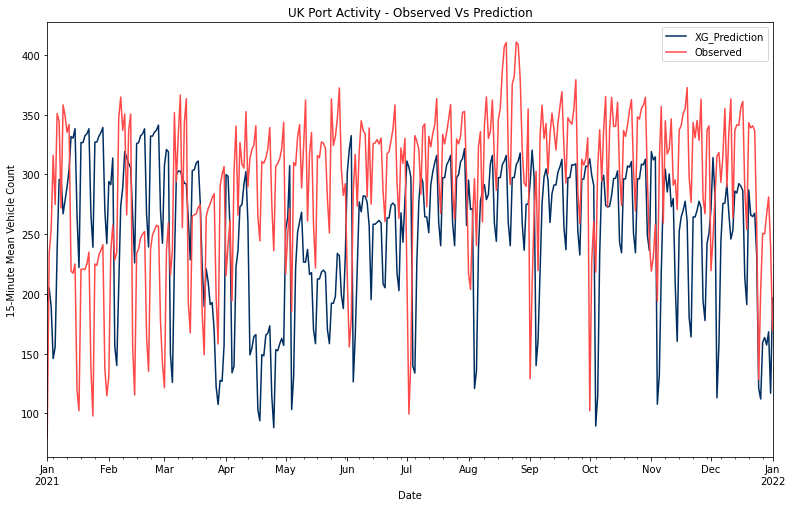

Naive    S_Naive        Avg   Diff_Avg      AR(p)  \
hwg_df            2.506        NaN      2.580      2.557      2.455   
eth_df           81.470        NaN     88.563     81.888     81.536   
snp_df           21.775        NaN     23.260     22.072     21.628   
daily_deaths     24.850        NaN     27.784     23.603     24.672   
UK_port_df       61.638     74.931     56.702     62.113     56.090   
retail_df     33150.678  24153.515  26096.751  33637.869  28167.797   

              Exp_Decomp  Low_Decomp  STL_Decomp    ARMA      ARIMA  \
hwg_df               NaN       2.251         NaN     NaN      2.460   
eth_df             81.99      76.765         NaN     NaN     81.513   
snp_df               NaN      21.083         NaN  21.771     21.645   
daily_deaths         NaN      20.524         NaN     NaN     24.835   
UK_port_df           NaN      48.037         NaN     NaN     60.026   
retail_df            NaN   10185.235    5136.946     NaN  30915.954   

                SARIMAX  XGBoost    Best Alg  
hwg_df              NaN      NaN  Low_Decomp  
eth_df              NaN      NaN  Low_Decomp  
snp_df              NaN      NaN  Low_Decomp  
daily_deaths        NaN      NaN  Low_Decomp  
UK_port_df          NaN   90.047  Low_Decomp  
retail_df     13488.293      NaN  STL_Decomp

In [101]:
port_XG_ALL[['XG_Prediction','Observed']]['2021-01-01':'2022-01-01'].plot()
plt.title('UK Port Activity - Observed Vs Prediction')
plt.ylabel('15-Minute Mean Vehicle Count')
plt.show()

RMSE = assess_predictions(port_XG_ALL, 'Observed', 'XG_Prediction')[1]
add_error_col(errors_df, 'XGBoost', 'UK_port_df', RMSE)

As we can see its the worst performing algorthm for this dataset by quite a margin. This shows that it may be more difficult to optimise machine learning approaches for this sort of analysis, when much simpler, less computational expensive, traditional methods work better and quicker. These techniques only become more benficial when its vastly multivariate and identifying future trends comes from external, non-numerical data.

***
# 10. Conclusion
***
***
To conclude, its obvious that decomposition methods reign superior for the majority of cases, at least this is the case in our portfolio of data, with Lowess decomposition working best, and its seasonal counterpart working best of seasonal data. Hence, the better we can get a short-term prediction with a low RMSE, the better we can predict further with Monte Carlo methods, leading to potentially more successful decision making.

In [103]:
errors_df.to_csv('errors_summary.csv')